In [20]:
import pandas as pd
import hashlib
import logging

# Configure structured logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# File paths
input_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Merged-Dataset-Final.csv"
output_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset.csv"

# Load dataset
df = pd.read_csv(input_path, low_memory=False)

# Generate a unique identifier for each row based on selected key columns
def generate_unique_id(row):
    hash_input = str(row.to_dict())  # Convert row to string format
    return hashlib.md5(hash_input.encode()).hexdigest()

logging.info("Generating unique identifiers for dataset...")
df["Unique_ID"] = df.apply(generate_unique_id, axis=1)

# Reorder columns to have Unique_ID first
df = df[["Unique_ID"] + [col for col in df.columns if col != "Unique_ID"]]

# Save indexed dataset
df.to_csv(output_path, index=False)
logging.info(f"Indexed dataset saved to: {output_path}")

2025-03-15 21:55:42,217 - INFO - Generating unique identifiers for dataset...
2025-03-15 21:58:01,040 - INFO - Indexed dataset saved to: /Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset.csv


In [28]:
import pandas as pd
import logging
import os

# Configure logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# File paths
input_file = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset.csv"
output_file = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"

# Load dataset
logging.info(f"Loading dataset from: {input_file}")
df = pd.read_csv(input_file, low_memory=False)

# Check if Timestamp column exists
if "Timestamp" not in df.columns:
    logging.error("Timestamp column not found. Ensure the dataset includes timestamps before running this script.")
    exit()

# Convert Timestamp column to datetime format
logging.info("Converting Timestamp column to datetime format...")
df["Timestamp"] = pd.to_datetime(df["Timestamp"], format="%d/%m/%Y %H:%M:%S", errors="coerce")

# Handle conversion errors
num_nulls = df["Timestamp"].isnull().sum()
if num_nulls > 0:
    logging.warning(f"{num_nulls} timestamps could not be converted. Replacing with the median timestamp.")
    median_time = df["Timestamp"].median()
    df["Timestamp"].fillna(median_time, inplace=True)

# Extract new time-based features
logging.info("Extracting time-based features...")
df["Hour"] = df["Timestamp"].dt.hour
df["Day"] = df["Timestamp"].dt.day
df["Month"] = df["Timestamp"].dt.month
df["Weekday"] = df["Timestamp"].dt.weekday  # 0 = Monday, 6 = Sunday

# Compute elapsed time since the first record
df["Elapsed_Time"] = (df["Timestamp"] - df["Timestamp"].min()).dt.total_seconds()

# Drop original Timestamp column if no longer needed
df.drop(columns=["Timestamp"], inplace=True)

# Save the processed dataset
logging.info(f"Saving processed dataset to: {output_file}")
df.to_csv(output_file, index=False)

logging.info("Timestamp processing completed successfully. Dataset is ready for further analysis.")

2025-03-15 22:45:24,460 - INFO - Loading dataset from: /Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset.csv
2025-03-15 22:45:45,303 - INFO - Converting Timestamp column to datetime format...
2025-03-15 22:45:45,542 - INFO - Extracting time-based features...
2025-03-15 22:45:46,028 - INFO - Saving processed dataset to: /Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv
2025-03-15 22:46:35,799 - INFO - Timestamp processing completed successfully. Dataset is ready for further analysis.


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure Seaborn for better visualization
sns.set_style("whitegrid")

# Define dataset path
dataset_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"
df = pd.read_csv(dataset_path)

# ============================
# 1. Dataset Overview
# ============================
print("Dataset Shape:", df.shape)

print("\nFirst 5 Rows of the Dataset:")
display(df.head())

print("\nColumn Names and Data Types:")
display(df.dtypes)

print("\nChecking for Missing Values:")
display(df.isnull().sum())

print("\nChecking for Duplicate Rows:")
print("Total Duplicate Rows:", df.duplicated().sum())

Dataset Shape: (2270317, 85)

First 5 Rows of the Dataset:


,Unique_ID,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Hour,Day,Month,Weekday,Elapsed_Time
0,1c26ebaefde66596cc3c298be777a338,443.0,6.0,94658.0,6.0,7.0,708.0,3718.0,387.0,0.0,...,0.0,0.0,0.0,0.0,Benign,8,28,2,2,1119271.0
1,bfb8cd0db2ba7dc420064158797f38a6,443.0,6.0,206.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Benign,8,28,2,2,1119271.0
2,0ef4f2a5a357de7cbde43100fb5d04f8,445.0,6.0,165505.0,3.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Benign,8,28,2,2,1119273.0
3,fb5e53288fc10f9e1bdc147faa56374a,443.0,6.0,102429.0,6.0,7.0,708.0,3718.0,387.0,0.0,...,0.0,0.0,0.0,0.0,Benign,8,28,2,2,1119274.0
4,15dd662e119e1bc4fe77eaffd22f6a43,443.0,6.0,167.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Benign,8,28,2,2,1119274.0



Column Names and Data Types:


Unique_ID         object
Dst Port         float64
Protocol         float64
Flow Duration    float64
Tot Fwd Pkts     float64
                  ...   
Hour               int64
Day                int64
Month              int64
Weekday            int64
Elapsed_Time     float64
Length: 85, dtype: object


Checking for Missing Values:


Unique_ID        0
Dst Port         0
Protocol         0
Flow Duration    0
Tot Fwd Pkts     0
                ..
Hour             0
Day              0
Month            0
Weekday          0
Elapsed_Time     0
Length: 85, dtype: int64


Checking for Duplicate Rows:
Total Duplicate Rows: 0


In [10]:
# ============================
# 2. Statistical Analysis
# ============================
print("\nStatistical Summary of Features:")
display(df.describe())


Statistical Summary of Features:


,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Hour,Day,Month,Weekday,Elapsed_Time
count,2.270317e+06,2.270317e+06,2.270317e+06,2.270317e+06,2.270317e+06,2.270317e+06,2.270317e+06,2.270317e+06,2.270317e+06,2.270317e+06,...,2.270317e+06,2.270317e+06,2.270317e+06,2.270317e+06,2.270317e+06,2.270317e+06,2.270317e+06,2270317.0,2.270317e+06,2.270317e+06
mean,6.154646e+03,8.398626e+00,1.557901e+07,4.465864e+01,6.681058e+00,1.667651e+03,5.548635e+03,1.370873e+02,1.007913e+01,3.623258e+01,...,9.571855e+04,8.651295e+06,1.723485e+05,8.824746e+06,8.491307e+06,7.833311e+00,2.338256e+01,2.0,2.685357e+00,7.201929e+05
std,1.565928e+04,4.672804e+00,3.166631e+07,2.328709e+03,2.272663e+02,1.251020e+05,3.155935e+05,2.492628e+02,2.709476e+01,5.425407e+01,...,1.664592e+06,2.042859e+07,1.769064e+06,2.066023e+07,2.035969e+07,3.620772e+00,3.198040e+00,0.0,1.280457e+00,2.725894e+05
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.500000e+01,2.0,1.000000e+00,0.000000e+00
25%,8.000000e+01,6.000000e+00,9.430000e+02,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,2.000000e+01,2.0,1.000000e+00,4.381340e+05
50%,8.000000e+01,6.000000e+00,1.122852e+06,2.000000e+00,1.000000e+00,3.100000e+01,9.700000e+01,3.100000e+01,0.000000e+00,1.900000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,2.300000e+01,2.0,2.000000e+00,6.886240e+05
75%,4.450000e+02,6.000000e+00,8.998500e+06,3.000000e+00,4.000000e+00,1.100000e+02,9.640000e+02,9.700000e+01,0.000000e+00,4.800000e+01,...,0.000000e+00,5.308489e+06,0.000000e+00,5.324609e+06,5.125622e+06,1.000000e+01,2.800000e+01,2.0,4.000000e+00,1.094945e+06
max,6.553400e+04,1.700000e+01,1.200000e+08,2.800430e+05,1.231180e+05,1.443918e+08,1.563604e+08,1.002400e+04,1.460000e+03,2.946679e+03,...,1.131927e+08,1.199916e+08,7.157844e+07,1.199916e+08,1.199916e+08,1.200000e+01,2.800000e+01,2.0,4.000000e+00,1.135937e+06


/var/folders/np/t44vfnk15zj6fnnj8h0mdmb40000gn/T/ipykernel_6334/459331032.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


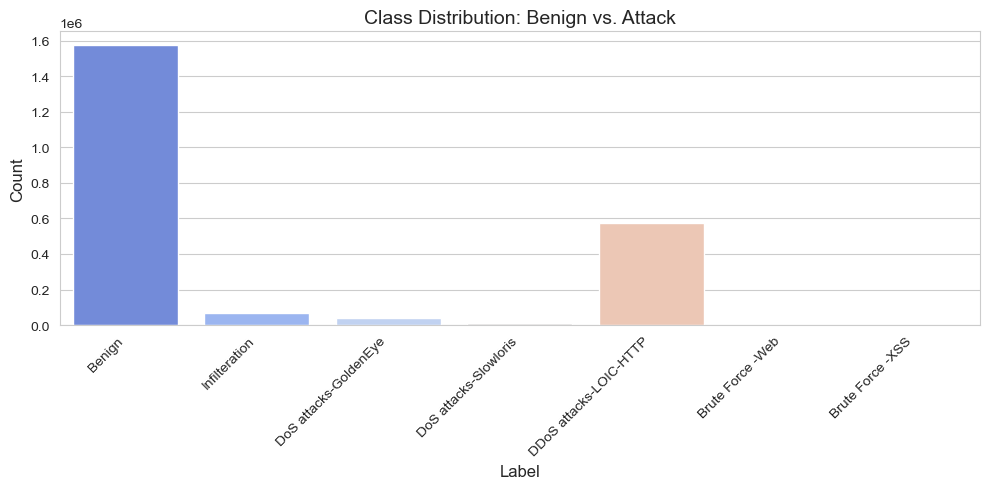


Class Distribution:
 Label
Benign                    1573665
DDoS attacks-LOIC-HTTP     576175
Infilteration               68224
DoS attacks-GoldenEye       41455
DoS attacks-Slowloris       10285
Brute Force -Web              362
Brute Force -XSS              151
Name: count, dtype: int64


In [14]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size and styling
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")

# Plot the class distribution with improved readability
ax = sns.countplot(data=df, x="Label", hue="Label", dodge=False, palette="coolwarm")

# Rotate x-axis labels for better visibility
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Set title and labels
plt.title("Class Distribution: Benign vs. Attack", fontsize=14)
plt.xlabel("Label", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Show plot with adjusted layout
plt.tight_layout()
plt.show()

# Print numerical class distribution for reference
print("\nClass Distribution:\n", df["Label"].value_counts())

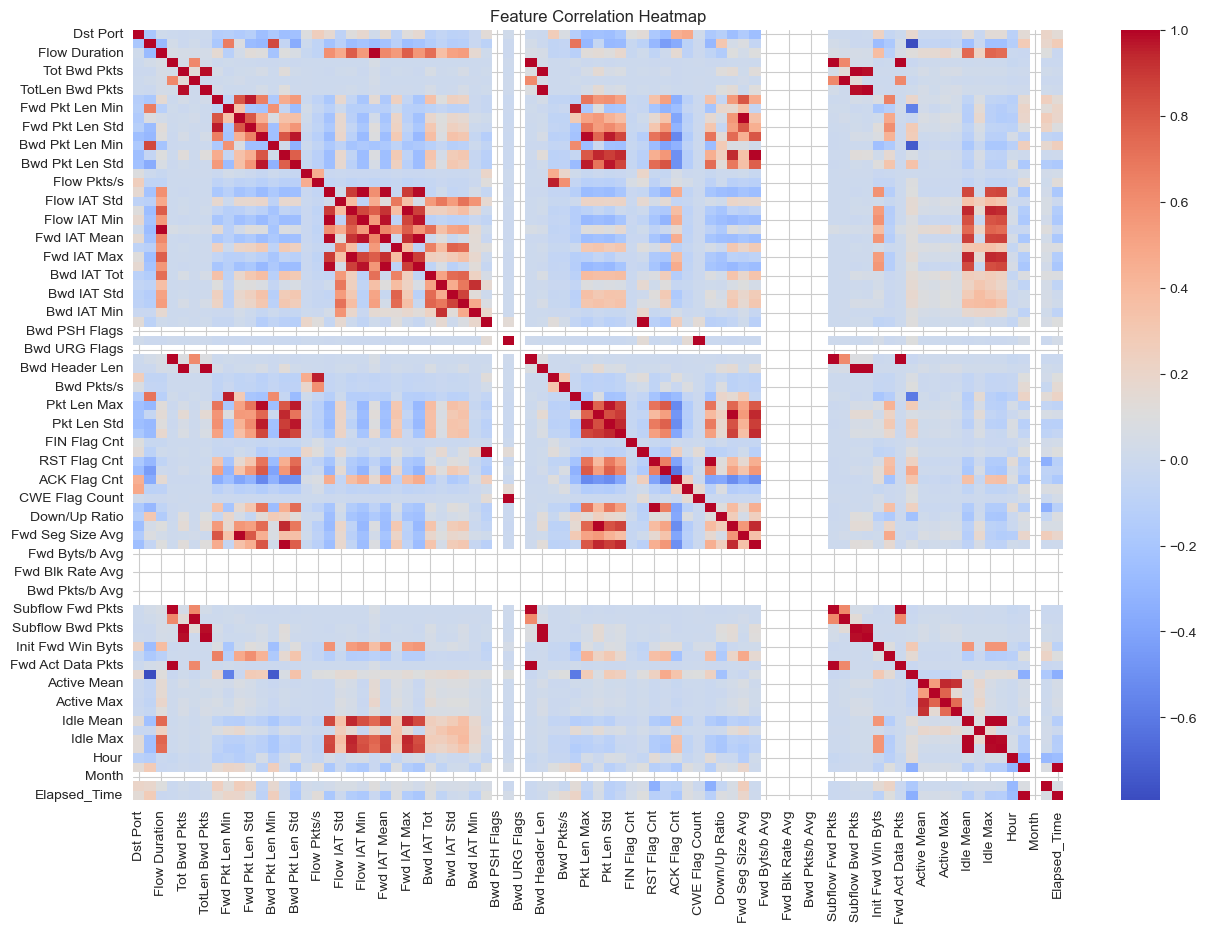


Highly Correlated Features saved to: Feature_Correlation_Matrix.csv


In [28]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (excluding Unique_ID)
dataset_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"
df = pd.read_csv(dataset_path).drop(columns=["Unique_ID"], errors="ignore")

# Ensure only numerical columns are selected for correlation matrix
df_numeric = df.select_dtypes(include=["number"])

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# Identify highly correlated features (correlation > 0.85)
threshold = 0.85
high_correlation_pairs = [
    (correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j])
    for i in range(len(correlation_matrix.columns)) for j in range(i)
    if abs(correlation_matrix.iloc[i, j]) > threshold
]

# Save highly correlated features
high_corr_df = pd.DataFrame(high_correlation_pairs, columns=["Feature 1", "Feature 2", "Correlation"])
high_corr_df.to_csv("/Users/akashthanneeru/Desktop/INADS_Data/Feature_Correlation_Matrix.csv", index=False)

print("\nHighly Correlated Features saved to: Feature_Correlation_Matrix.csv")

2025-03-16 00:41:08,733 - INFO - Loading dataset from: /Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv
2025-03-16 00:41:16,739 - INFO - Dataset loaded successfully. Shape: (2270317, 84)
2025-03-16 00:41:18,152 - INFO - Train-Test Split: Training Size: (1816253, 83), Testing Size: (454064, 83)
2025-03-16 00:41:18,152 - INFO - Finding optimal number of estimators using Out-of-Bag (OOB) score.
2025-03-16 00:42:08,264 - INFO - Evaluated n_estimators = 50 | OOB Score = 0.9505
2025-03-16 00:43:43,817 - INFO - Evaluated n_estimators = 100 | OOB Score = 0.9507
2025-03-16 00:46:10,732 - INFO - Evaluated n_estimators = 150 | OOB Score = 0.9508
2025-03-16 00:49:43,057 - INFO - Evaluated n_estimators = 200 | OOB Score = 0.9508
2025-03-16 00:54:07,679 - INFO - Evaluated n_estimators = 250 | OOB Score = 0.9508
2025-03-16 01:02:30,289 - INFO - Evaluated n_estimators = 300 | OOB Score = 0.9508
2025-03-16 01:02:30,291 - INFO - Optimal number of estimators found: 30

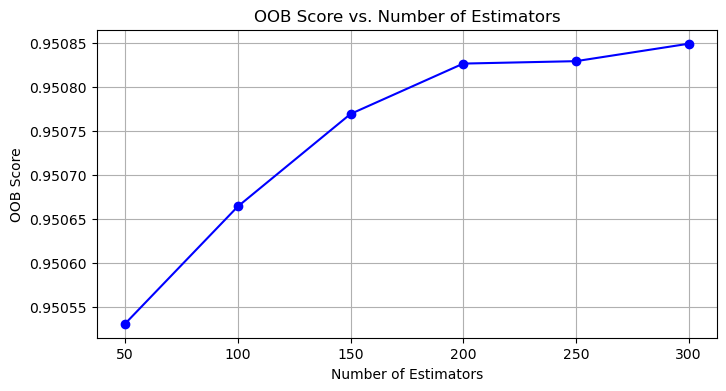

In [1]:
# Import necessary libraries
import pandas as pd
import logging
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Configure logging
logging.basicConfig(format="%(asctime)s - %(levelname)s - %(message)s", level=logging.INFO)

# Define dataset path
dataset_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"

# Load dataset
logging.info("Loading dataset from: %s", dataset_path)
df = pd.read_csv(dataset_path).drop(columns=["Unique_ID"], errors="ignore")
logging.info("Dataset loaded successfully. Shape: %s", df.shape)

# Separate features and labels
X = df.select_dtypes(include=["number"]).drop(columns=["Label"], errors="ignore")
y = df["Label"].astype("category").cat.codes  # Encode labels

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
logging.info("Train-Test Split: Training Size: %s, Testing Size: %s", X_train.shape, X_test.shape)

# **Auto-Tune Number of Estimators Using OOB Score**
logging.info("Finding optimal number of estimators using Out-of-Bag (OOB) score.")

oob_scores = []
estimator_range = list(range(50, 301, 50))  # Test estimators from 50 to 300 in increments of 50

for n_estimators in estimator_range:
    rf = RandomForestClassifier(n_estimators=n_estimators, oob_score=True, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    oob_scores.append((n_estimators, rf.oob_score_))
    logging.info("Evaluated n_estimators = %s | OOB Score = %.4f", n_estimators, rf.oob_score_)

# **Find the best estimator count based on highest OOB score**
best_n_estimators = max(oob_scores, key=lambda x: x[1])[0]
best_oob_score = max(oob_scores, key=lambda x: x[1])[1]
logging.info("Optimal number of estimators found: %s (OOB Score = %.4f)", best_n_estimators, best_oob_score)

# **Plot OOB Scores**
plt.figure(figsize=(8, 4))
plt.plot(estimator_range, [score[1] for score in oob_scores], marker="o", linestyle="-", color="b")
plt.xlabel("Number of Estimators")
plt.ylabel("OOB Score")
plt.title("OOB Score vs. Number of Estimators")
plt.grid()
plt.savefig("/Users/akashthanneeru/Desktop/INADS_Data/OOB_Estimator_Selection.png")
logging.info("OOB Score plot saved.")

# **Train Final Model with Best Estimator Count**
logging.info("Training Random Forest with optimal estimators: %s", best_n_estimators)
rf_model = RandomForestClassifier(n_estimators=best_n_estimators, oob_score=True, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Save Model
model_path = "/Users/akashthanneeru/Desktop/INADS_Data/Trained_RandomForest_Model.pkl"
joblib.dump(rf_model, model_path)
logging.info("Trained Random Forest Model saved to: %s", model_path)
logging.info("Final Model OOB Score: %.4f", rf_model.oob_score_)

logging.info("Model Training Completed Successfully.")

2025-03-16 01:20:51,234 - INFO - Starting Random Forest Model Evaluation
2025-03-16 01:20:51,235 - INFO - Loading dataset from: /Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv
2025-03-16 01:21:01,359 - INFO - Converted Label column to string format for consistency.
2025-03-16 01:21:01,518 - INFO - Created new label encoder and saved.
2025-03-16 01:21:01,519 - INFO - Loading trained model from: /Users/akashthanneeru/Desktop/INADS_Data/Trained_RandomForest_Model.pkl
2025-03-16 01:21:04,509 - INFO - Generating predictions...
2025-03-16 01:21:13,491 - INFO - Generating Classification Report...


Classification Report:



2025-03-16 01:21:51,034 - INFO - Generating Confusion Matrix...


                        precision    recall  f1-score   support

                Benign       0.98      0.99      0.98   1573665
      Brute Force -Web       1.00      0.96      0.98       362
      Brute Force -XSS       1.00      0.95      0.98       151
DDoS attacks-LOIC-HTTP       1.00      1.00      1.00    576175
 DoS attacks-GoldenEye       1.00      1.00      1.00     41455
 DoS attacks-Slowloris       1.00      1.00      1.00     10285
         Infilteration       0.59      0.45      0.51     68224

              accuracy                           0.97   2270317
             macro avg       0.94      0.91      0.92   2270317
          weighted avg       0.97      0.97      0.97   2270317



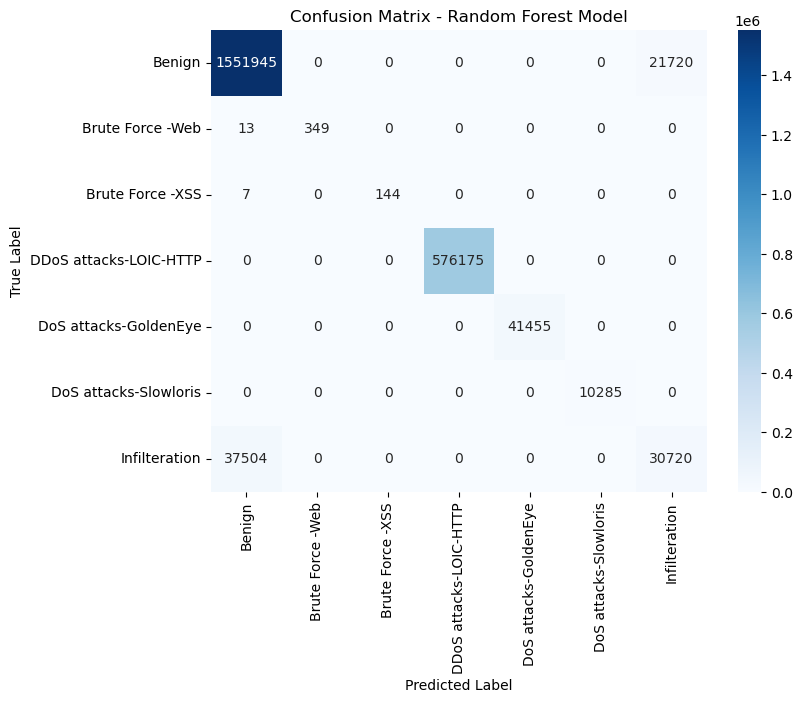

2025-03-16 01:21:55,076 - INFO - Confusion Matrix displayed successfully.
2025-03-16 01:21:55,076 - INFO - Computing Feature Importance...
/var/folders/np/t44vfnk15zj6fnnj8h0mdmb40000gn/T/ipykernel_8686/2339744941.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance["Importance"], y=feature_importance["Feature"], palette="coolwarm")


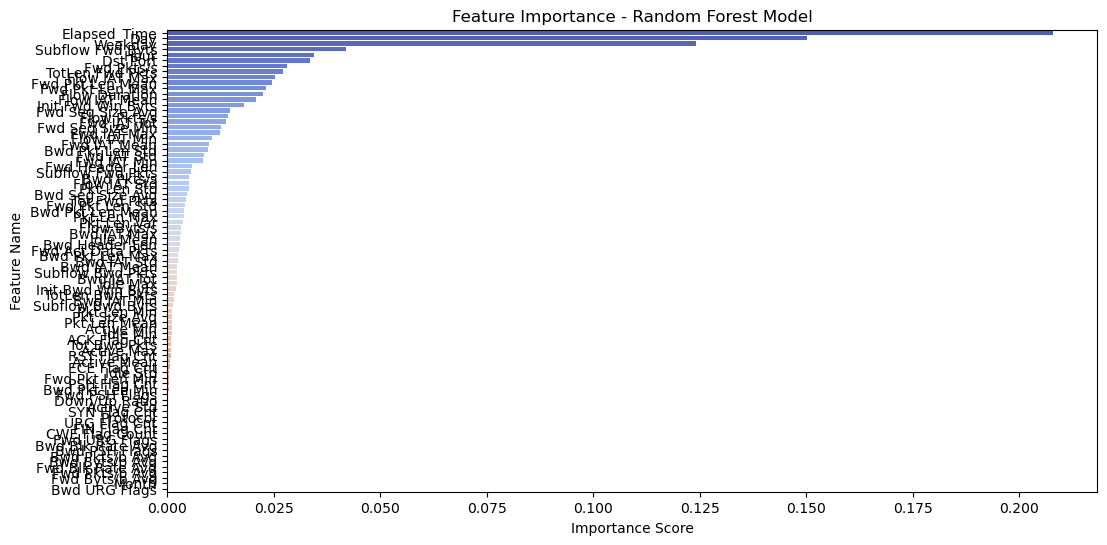

2025-03-16 01:21:55,448 - INFO - Feature Importance plot displayed successfully.
2025-03-16 01:21:55,450 - INFO - Feature Importance saved to: /Users/akashthanneeru/Desktop/INADS_Data/Feature_Importance_RandomForest.csv
2025-03-16 01:21:55,450 - INFO - Model Evaluation Completed Successfully.


In [10]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import logging
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Set up logging
logging.basicConfig(format="%(asctime)s - %(levelname)s - %(message)s", level=logging.INFO)
logging.info("Starting Random Forest Model Evaluation")

# Set dataset path
dataset_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"

# Load dataset (excluding Unique_ID)
logging.info(f"Loading dataset from: {dataset_path}")
df = pd.read_csv(dataset_path).drop(columns=["Unique_ID"], errors="ignore")

# Convert Label column to string format
df["Label"] = df["Label"].astype(str)
logging.info("Converted Label column to string format for consistency.")

# Encode Labels (Ensure the mapping used during training is retrieved)
label_encoder_path = "/Users/akashthanneeru/Desktop/INADS_Data/Label_Encoder.pkl"
try:
    label_encoder = joblib.load(label_encoder_path)
    logging.info("Loaded existing label encoder.")
except FileNotFoundError:
    label_encoder = LabelEncoder()
    df["Label"] = label_encoder.fit_transform(df["Label"])
    joblib.dump(label_encoder, label_encoder_path)
    logging.info("Created new label encoder and saved.")

# Load trained Random Forest Model
model_path = "/Users/akashthanneeru/Desktop/INADS_Data/Trained_RandomForest_Model.pkl"
logging.info(f"Loading trained model from: {model_path}")
rf_model = joblib.load(model_path)

# Extract features and labels
X = df.drop(columns=["Label"])
y = df["Label"]

# Generate predictions
logging.info("Generating predictions...")
y_pred = rf_model.predict(X)

# Decode predicted labels back to original text format
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_true_decoded = label_encoder.inverse_transform(y)

# ============================
# 1. Classification Report
# ============================
logging.info("Generating Classification Report...")
print("Classification Report:\n")
print(classification_report(y_true_decoded, y_pred_decoded))

# ============================
# 2. Confusion Matrix
# ============================
logging.info("Generating Confusion Matrix...")
conf_matrix = confusion_matrix(y_true_decoded, y_pred_decoded)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest Model")
plt.show()
logging.info("Confusion Matrix displayed successfully.")

# ============================
# 3. Feature Importance
# ============================
logging.info("Computing Feature Importance...")
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance["Importance"], y=feature_importance["Feature"], palette="coolwarm")
plt.title("Feature Importance - Random Forest Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()
logging.info("Feature Importance plot displayed successfully.")

# Save feature importance results
feature_importance_path = "/Users/akashthanneeru/Desktop/INADS_Data/Feature_Importance_RandomForest.csv"
feature_importance.to_csv(feature_importance_path, index=False)
logging.info(f"Feature Importance saved to: {feature_importance_path}")

logging.info("Model Evaluation Completed Successfully.")

2025-03-16 01:43:39,821 - INFO - Loading trained model from: /Users/akashthanneeru/Desktop/INADS_Data/Trained_RandomForest_Model.pkl
2025-03-16 01:43:42,585 - INFO - Loading dataset from: /Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv
/var/folders/np/t44vfnk15zj6fnnj8h0mdmb40000gn/T/ipykernel_8686/714552954.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features["Importance"], y=top_features["Feature"], palette="coolwarm")


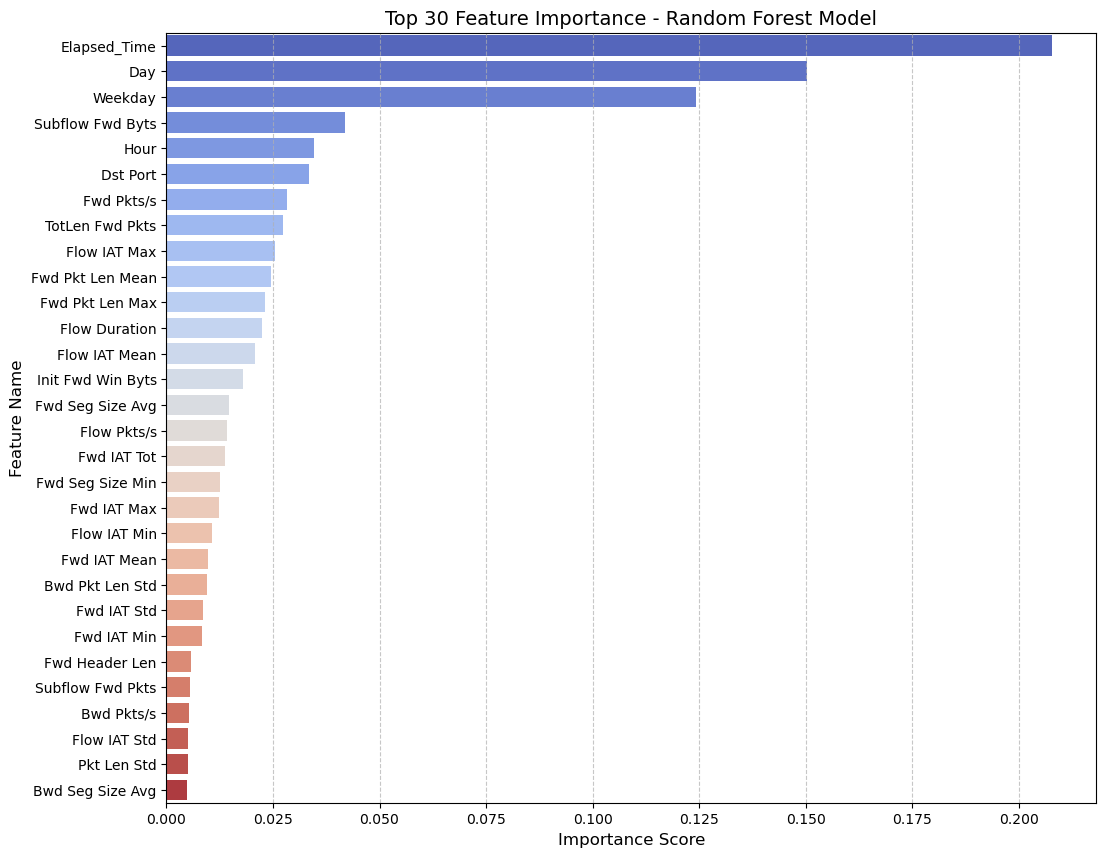

2025-03-16 01:43:52,585 - INFO - Feature Importance saved to: /Users/akashthanneeru/Desktop/INADS_Data/Feature_Importance_RandomForest.csv


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import logging

# Set up logging
logging.basicConfig(format="%(asctime)s - %(levelname)s - %(message)s", level=logging.INFO)

# Load trained Random Forest model
model_path = "/Users/akashthanneeru/Desktop/INADS_Data/Trained_RandomForest_Model.pkl"
logging.info(f"Loading trained model from: {model_path}")
rf_model = joblib.load(model_path)

# Load dataset (excluding Unique_ID and Label)
dataset_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"
logging.info(f"Loading dataset from: {dataset_path}")
df = pd.read_csv(dataset_path).drop(columns=["Unique_ID", "Label"], errors="ignore")

# Extract feature importances
feature_importance = pd.DataFrame({
    "Feature": df.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Limit to Top 30 Features for better readability
top_features = feature_importance[:30]

# Plot Feature Importance
plt.figure(figsize=(12, 10))
sns.barplot(x=top_features["Importance"], y=top_features["Feature"], palette="coolwarm")

# Formatting
plt.title("Top 30 Feature Importance - Random Forest Model", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature Name", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show plot
plt.show()

# Save feature importance results
feature_importance_path = "/Users/akashthanneeru/Desktop/INADS_Data/Feature_Importance_RandomForest.csv"
feature_importance.to_csv(feature_importance_path, index=False)
logging.info(f"Feature Importance saved to: {feature_importance_path}")

2025-03-16 22:21:47,959 - INFO - Starting Feature Correlation Analysis.
2025-03-16 22:21:47,960 - INFO - Loading dataset from: /Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv
2025-03-16 22:21:57,024 - INFO - Computing feature correlation matrix.
2025-03-16 22:21:59,748 - INFO - Identified highly correlated feature pairs:
2025-03-16 22:21:59,748 - INFO - Fwd IAT Mean - Flow IAT Mean (Correlation: 0.99)
2025-03-16 22:22:00,593 - INFO - Feature Correlation Heatmap saved.
2025-03-16 22:22:00,594 - INFO - Feature Correlation Analysis Completed Successfully.


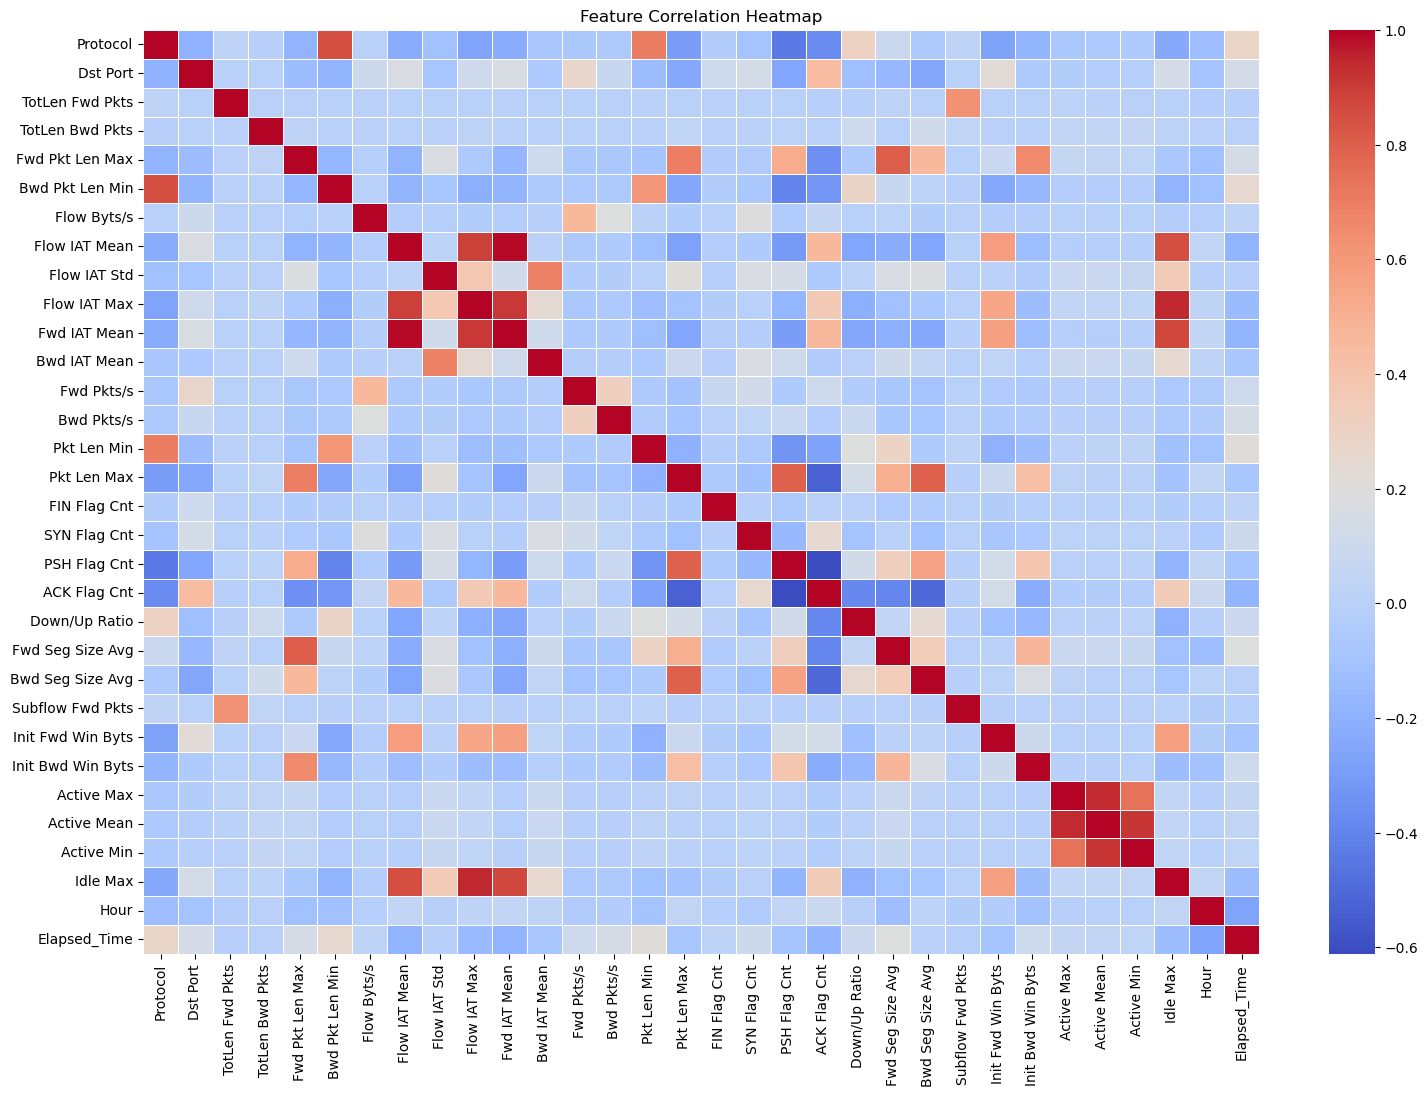

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import logging

# Configure logging for tracking execution progress
logging.basicConfig(format="%(asctime)s - %(levelname)s - %(message)s", level=logging.INFO)
logging.info("Starting Feature Correlation Analysis.")

# Define dataset path
dataset_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"

# Load dataset and retain only selected features
logging.info(f"Loading dataset from: {dataset_path}")
df = pd.read_csv(dataset_path)

# Define the selected features for analysis
selected_features = [
    "Protocol", "Dst Port", "TotLen Fwd Pkts", "TotLen Bwd Pkts", "Fwd Pkt Len Max", "Bwd Pkt Len Min",
    "Flow Byts/s", "Flow IAT Mean", "Flow IAT Std", "Flow IAT Max",
    "Fwd IAT Mean", "Bwd IAT Mean", "Fwd Pkts/s", "Bwd Pkts/s", "Pkt Len Min", "Pkt Len Max",
    "FIN Flag Cnt", "SYN Flag Cnt", "PSH Flag Cnt", "ACK Flag Cnt", "Down/Up Ratio",
    "Fwd Seg Size Avg", "Bwd Seg Size Avg", "Subflow Fwd Pkts", "Init Fwd Win Byts", "Init Bwd Win Byts",
    "Active Max", "Active Mean", "Active Min", "Idle Max",
    "Hour", "Elapsed_Time"
]

# Retain only selected features
df = df[selected_features]

# Compute correlation matrix
logging.info("Computing feature correlation matrix.")
correlation_matrix = df.corr()

# Identify highly correlated features (correlation > 0.95)
highly_correlated_pairs = []
threshold = 0.95

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            feature1 = correlation_matrix.columns[i]
            feature2 = correlation_matrix.columns[j]
            correlation_value = correlation_matrix.iloc[i, j]
            highly_correlated_pairs.append((feature1, feature2, correlation_value))

# Display highly correlated feature pairs
if highly_correlated_pairs:
    logging.info("Identified highly correlated feature pairs:")
    for feature1, feature2, correlation_value in highly_correlated_pairs:
        logging.info(f"{feature1} - {feature2} (Correlation: {correlation_value:.2f})")
else:
    logging.info("No highly correlated features detected above threshold.")

# Generate correlation heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.savefig("/Users/akashthanneeru/Desktop/INADS_Data/Feature_Correlation_Heatmap.png", dpi=300)
logging.info("Feature Correlation Heatmap saved.")

logging.info("Feature Correlation Analysis Completed Successfully.")

2025-03-17 02:12:04,312 - INFO - Starting Per-Layer Correlation Analysis.
2025-03-17 02:12:04,313 - INFO - Loading dataset from: /Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv
2025-03-17 02:12:14,086 - INFO - Computing correlation matrix for Global Layer...


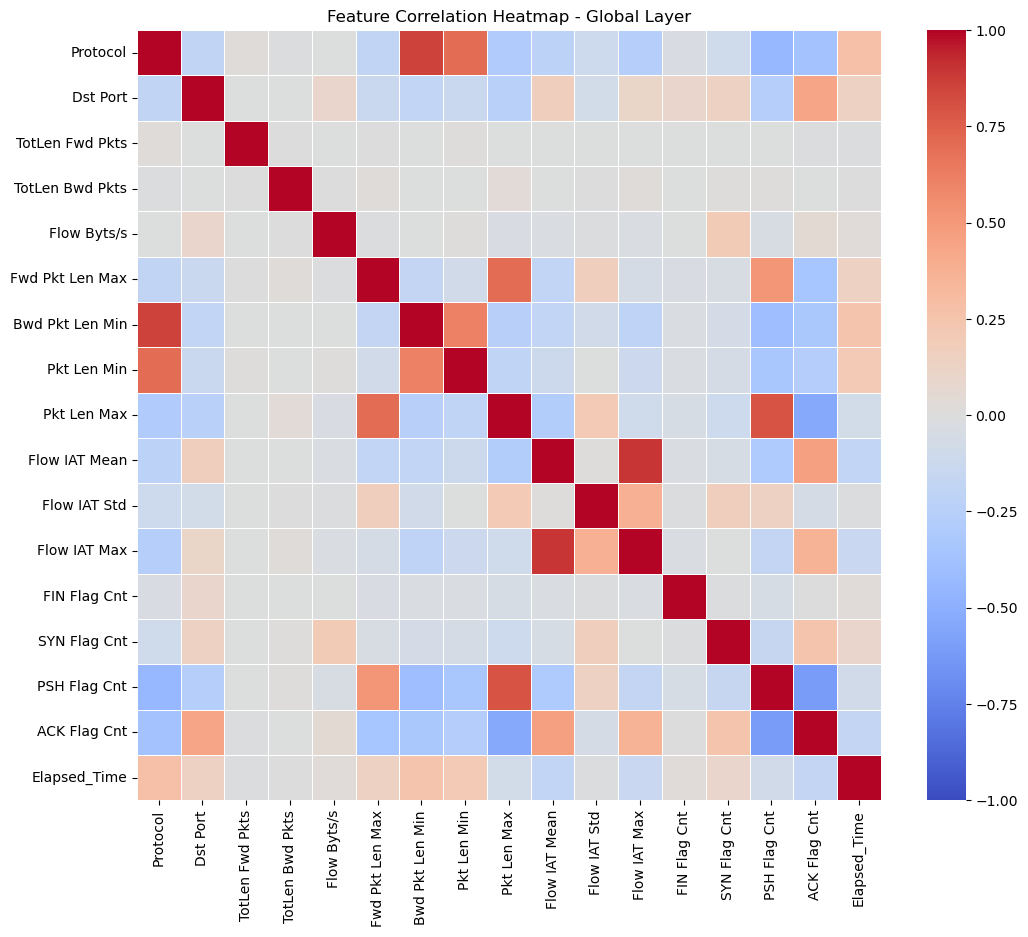

2025-03-17 02:12:15,566 - INFO - Feature Correlation Heatmap saved for Global Layer: /Users/akashthanneeru/Desktop/INADS_Data/Feature_Correlation_Global.png
2025-03-17 02:12:15,567 - INFO - Computing correlation matrix for Edge Layer...


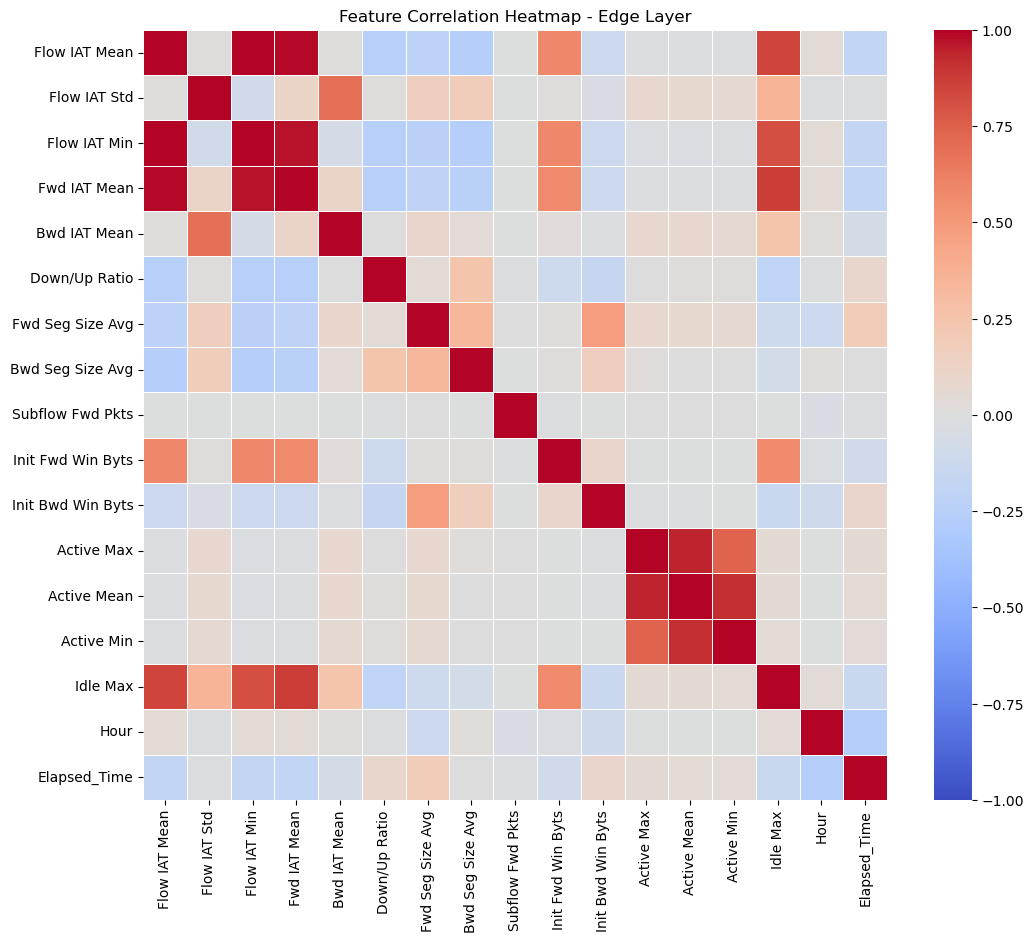

2025-03-17 02:12:17,023 - INFO - Feature Correlation Heatmap saved for Edge Layer: /Users/akashthanneeru/Desktop/INADS_Data/Feature_Correlation_Edge.png
2025-03-17 02:12:17,023 - INFO - Computing correlation matrix for Device Layer...


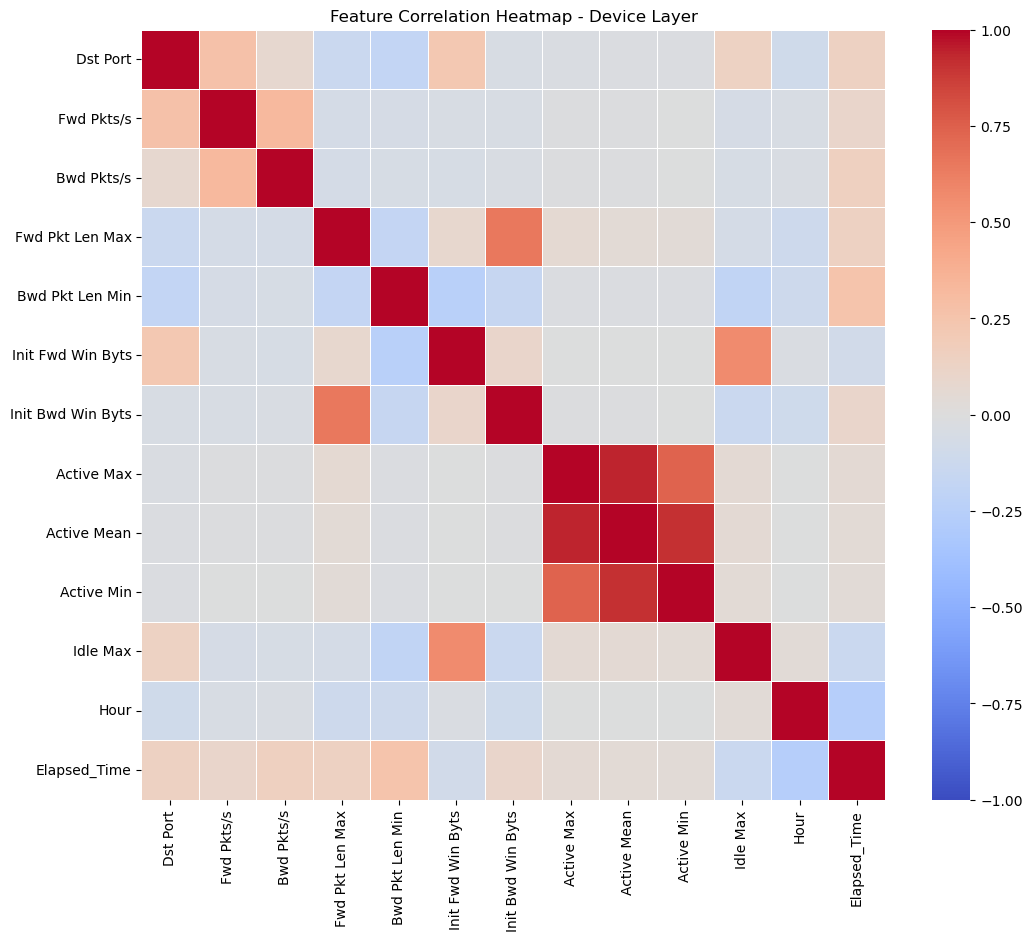

2025-03-17 02:12:18,088 - INFO - Feature Correlation Heatmap saved for Device Layer: /Users/akashthanneeru/Desktop/INADS_Data/Feature_Correlation_Device.png
2025-03-17 02:12:18,088 - INFO - Per-Layer Correlation Analysis Completed Successfully.


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import logging

# Configure Logging
logging.basicConfig(format="%(asctime)s - %(levelname)s - %(message)s", level=logging.INFO)
logging.info("Starting Per-Layer Correlation Analysis.")

# Load Dataset
dataset_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"
logging.info(f"Loading dataset from: {dataset_path}")
df = pd.read_csv(dataset_path)

# Define Per-Layer Feature Sets
global_features = [
    "Protocol", "Dst Port", "TotLen Fwd Pkts", "TotLen Bwd Pkts", "Flow Byts/s",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min", "Pkt Len Min", "Pkt Len Max",
    "Flow IAT Mean", "Flow IAT Std", "Flow IAT Max",
    "FIN Flag Cnt", "SYN Flag Cnt", "PSH Flag Cnt", "ACK Flag Cnt",
    "Elapsed_Time"
]

edge_features = [
    "Flow IAT Mean", "Flow IAT Std", "Flow IAT Min", "Fwd IAT Mean", "Bwd IAT Mean",
    "Down/Up Ratio", "Fwd Seg Size Avg", "Bwd Seg Size Avg", "Subflow Fwd Pkts",
    "Init Fwd Win Byts", "Init Bwd Win Byts",
    "Active Max", "Active Mean", "Active Min", "Idle Max",
    "Hour", "Elapsed_Time"
]

device_features = [
    "Dst Port", "Fwd Pkts/s", "Bwd Pkts/s",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min",
    "Init Fwd Win Byts", "Init Bwd Win Byts",
    "Active Max", "Active Mean", "Active Min", "Idle Max",
    "Hour", "Elapsed_Time"
]

# Define a function to compute and plot correlation heatmaps
def plot_correlation_matrix(features, layer_name):
    logging.info(f"Computing correlation matrix for {layer_name} Layer...")
    df_layer = df[features].corr()

    # Plot correlation heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(df_layer, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
    plt.title(f"Feature Correlation Heatmap - {layer_name} Layer")
    heatmap_path = f"/Users/akashthanneeru/Desktop/INADS_Data/Feature_Correlation_{layer_name}.png"
    plt.savefig(heatmap_path, dpi=300)
    plt.show()
    
    logging.info(f"Feature Correlation Heatmap saved for {layer_name} Layer: {heatmap_path}")

# Run Correlation Checks for Each Layer
plot_correlation_matrix(global_features, "Global")
plot_correlation_matrix(edge_features, "Edge")
plot_correlation_matrix(device_features, "Device")

logging.info("Per-Layer Correlation Analysis Completed Successfully.")

2025-03-17 02:41:07,571 - INFO - Starting Random Forest Training - Global Layer.
2025-03-17 02:42:09,625 - INFO - Global Model Training Completed in 50.71 seconds.
/var/folders/np/t44vfnk15zj6fnnj8h0mdmb40000gn/T/ipykernel_2872/1066885663.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="Blues_r")
2025-03-17 02:42:16,973 - INFO - Global Model Accuracy: 0.9493, Precision: 0.9476, Recall: 0.9493, F1-Score: 0.9485
2025-03-17 02:42:18,182 - INFO - Global Model Training Completed Successfully.


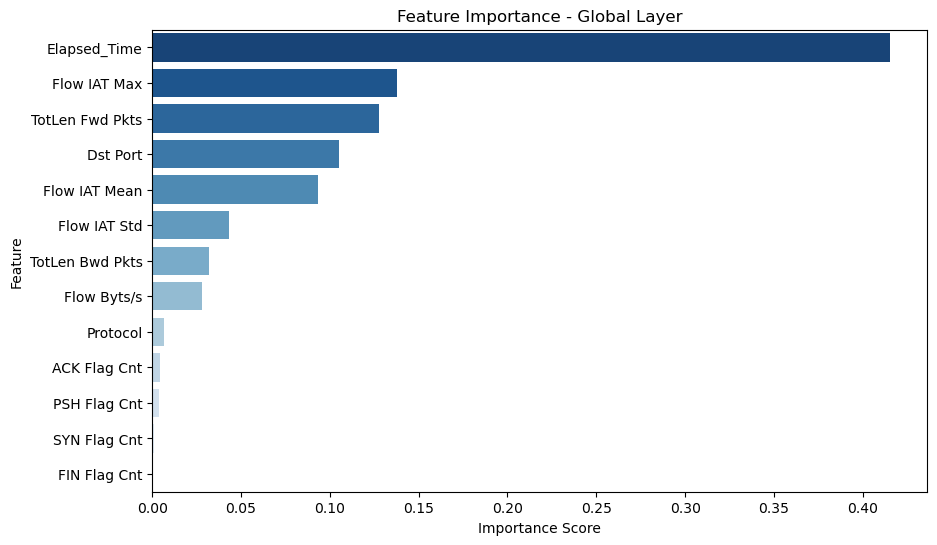

In [8]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import time
import logging
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Configure logging
logging.basicConfig(format="%(asctime)s - %(levelname)s - %(message)s", level=logging.INFO)
logging.info("Starting Random Forest Training - Global Layer.")

# Load dataset
dataset_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"
df = pd.read_csv(dataset_path)
df["Label"] = df["Label"].astype(str)

# Define features for the Global Layer
features_global = [
    "Protocol", "Dst Port", "TotLen Fwd Pkts", "TotLen Bwd Pkts", "Flow Byts/s", 
    "Flow IAT Mean", "Flow IAT Std", "Flow IAT Max", "FIN Flag Cnt", 
    "SYN Flag Cnt", "PSH Flag Cnt", "ACK Flag Cnt", "Elapsed_Time"
]

X = df[features_global]
y = df["Label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
logging.info(f"Global Model Training Completed in {round(end_time - start_time, 2)} seconds.")

# Feature Importance
feature_importance = model.feature_importances_
importance_df = pd.DataFrame({"Feature": features_global, "Importance": feature_importance}).sort_values(by="Importance", ascending=False)

# Save Feature Importance Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="Blues_r")
plt.title("Feature Importance - Global Layer")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.savefig("/Users/akashthanneeru/Desktop/INADS_Data/Feature_Importance_Global.png", dpi=300)

# Model Evaluation
y_pred = model.predict(X_test)
logging.info(f"Global Model Accuracy: {accuracy_score(y_test, y_pred):.4f}, Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}, Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}, F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

# Save Model
joblib.dump(model, "/Users/akashthanneeru/Desktop/INADS_Data/RandomForest_Global.pkl")
logging.info("Global Model Training Completed Successfully.")

2025-03-17 02:42:18,253 - INFO - Starting Random Forest Training - Edge Layer.
2025-03-17 02:43:24,656 - INFO - Edge Model Training Completed in 55.84 seconds.
/var/folders/np/t44vfnk15zj6fnnj8h0mdmb40000gn/T/ipykernel_2872/1696575095.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="Blues_r")
2025-03-17 02:43:31,733 - INFO - Edge Model Accuracy: 0.9508, Precision: 0.9495, Recall: 0.9508, F1-Score: 0.9501
2025-03-17 02:43:32,892 - INFO - Edge Model Training Completed Successfully.


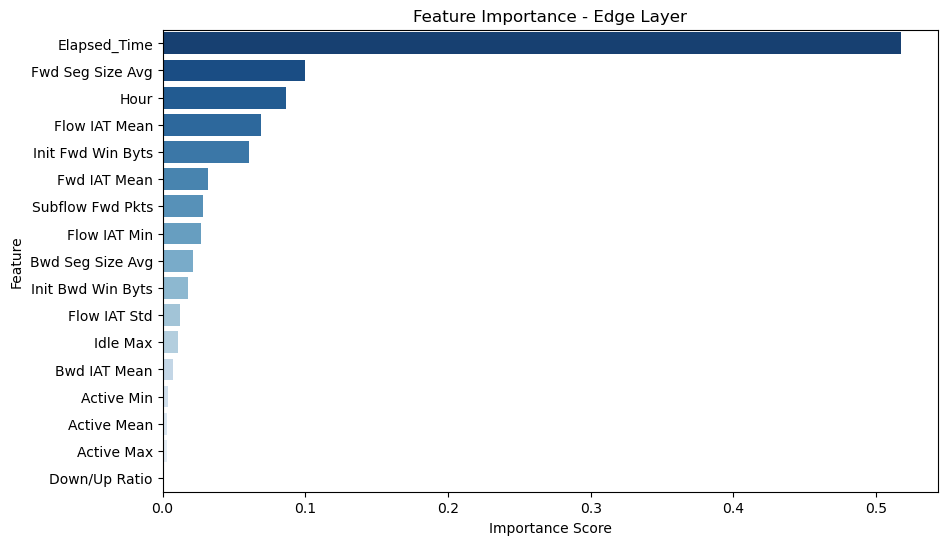

In [9]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import time
import logging
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Configure logging
logging.basicConfig(format="%(asctime)s - %(levelname)s - %(message)s", level=logging.INFO)
logging.info("Starting Random Forest Training - Edge Layer.")

# Load dataset
dataset_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"
df = pd.read_csv(dataset_path)
df["Label"] = df["Label"].astype(str)

# Define features for the Edge Layer
features_edge = [
    "Flow IAT Mean", "Flow IAT Std", "Flow IAT Min", "Fwd IAT Mean", "Bwd IAT Mean",
    "Down/Up Ratio", "Fwd Seg Size Avg", "Bwd Seg Size Avg", "Subflow Fwd Pkts",
    "Init Fwd Win Byts", "Init Bwd Win Byts", "Active Max", "Active Mean", 
    "Active Min", "Idle Max", "Hour", "Elapsed_Time"
]

X = df[features_edge]
y = df["Label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
logging.info(f"Edge Model Training Completed in {round(end_time - start_time, 2)} seconds.")

# Feature Importance
feature_importance = model.feature_importances_
importance_df = pd.DataFrame({"Feature": features_edge, "Importance": feature_importance}).sort_values(by="Importance", ascending=False)

# Save Feature Importance Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="Blues_r")
plt.title("Feature Importance - Edge Layer")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.savefig("/Users/akashthanneeru/Desktop/INADS_Data/Feature_Importance_Edge.png", dpi=300)

# Model Evaluation
y_pred = model.predict(X_test)
logging.info(f"Edge Model Accuracy: {accuracy_score(y_test, y_pred):.4f}, Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}, Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}, F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

# Save Model
joblib.dump(model, "/Users/akashthanneeru/Desktop/INADS_Data/RandomForest_Edge.pkl")
logging.info("Edge Model Training Completed Successfully.")

2025-03-17 07:28:01,859 - INFO - Starting Random Forest Training - Device Layer.
2025-03-17 07:28:52,820 - INFO - Device Model Training Completed in 39.9 seconds.
/var/folders/np/t44vfnk15zj6fnnj8h0mdmb40000gn/T/ipykernel_2872/3042316482.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="Blues_r")
2025-03-17 07:28:59,630 - INFO - Edge Model Accuracy: 0.9489, Precision: 0.9475, Recall: 0.9489, F1-Score: 0.9482
2025-03-17 07:29:01,244 - INFO - Device Model Training Completed Successfully.


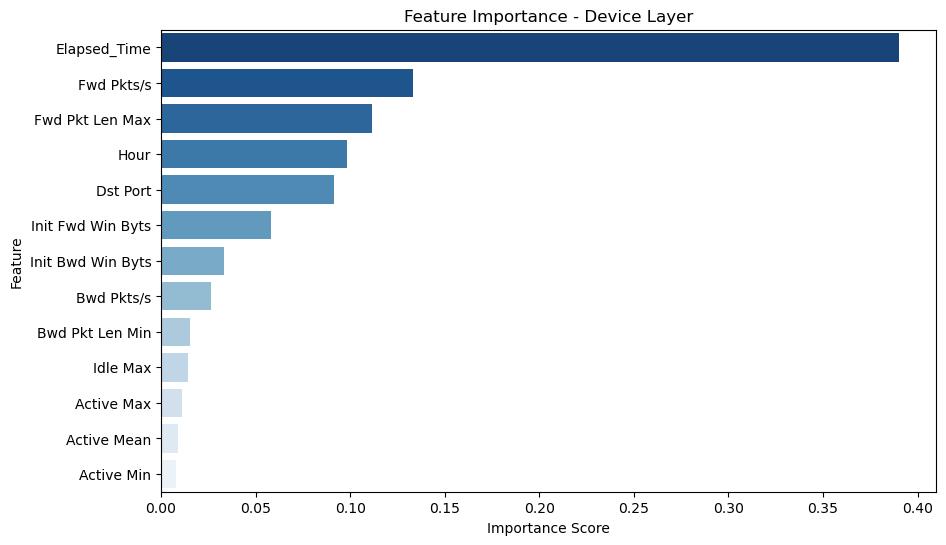

In [14]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import time
import logging
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Configure logging
logging.basicConfig(format="%(asctime)s - %(levelname)s - %(message)s", level=logging.INFO)
logging.info("Starting Random Forest Training - Device Layer.")

# Load dataset
dataset_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"
df = pd.read_csv(dataset_path)
df["Label"] = df["Label"].astype(str)

# Define features for the Device Layer
features_device = [
    "Dst Port", "Fwd Pkts/s", "Bwd Pkts/s", "Fwd Pkt Len Max", "Bwd Pkt Len Min",
    "Init Fwd Win Byts", "Init Bwd Win Byts", "Active Max", "Active Mean", 
    "Active Min", "Idle Max", "Hour", "Elapsed_Time"
]

X = df[features_device]
y = df["Label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
logging.info(f"Device Model Training Completed in {round(end_time - start_time, 2)} seconds.")

# Feature Importance
feature_importance = model.feature_importances_
importance_df = pd.DataFrame({"Feature": features_device, "Importance": feature_importance}).sort_values(by="Importance", ascending=False)

# Save Feature Importance Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="Blues_r")
plt.title("Feature Importance - Device Layer")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.savefig("/Users/akashthanneeru/Desktop/INADS_Data/Feature_Importance_Device.png", dpi=300)

# Model Evaluation
y_pred = model.predict(X_test)
logging.info(f"Edge Model Accuracy: {accuracy_score(y_test, y_pred):.4f}, Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}, Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}, F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")


# Save Model
joblib.dump(model, "/Users/akashthanneeru/Desktop/INADS_Data/RandomForest_Device.pkl")
logging.info("Device Model Training Completed Successfully.")

Training Baseline Model (Current Features)...
 Baseline Model - Performance Metrics
Accuracy: 0.9497
Precision: 0.8704
Recall: 0.8499
F1-Score: 0.8597

Training Expanded Model (With Dropped Features)...
 Expanded Model - Performance Metrics
Accuracy: 0.9500
Precision: 0.8713
Recall: 0.8507
F1-Score: 0.8605

 **Comparison of Baseline vs. Expanded Model**
 Accuracy Change: 0.0003
 Precision Change: 0.0008
 Recall Change: 0.0007
 F1-Score Change: 0.0008


/var/folders/np/t44vfnk15zj6fnnj8h0mdmb40000gn/T/ipykernel_2872/2916356957.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="Blues_r")


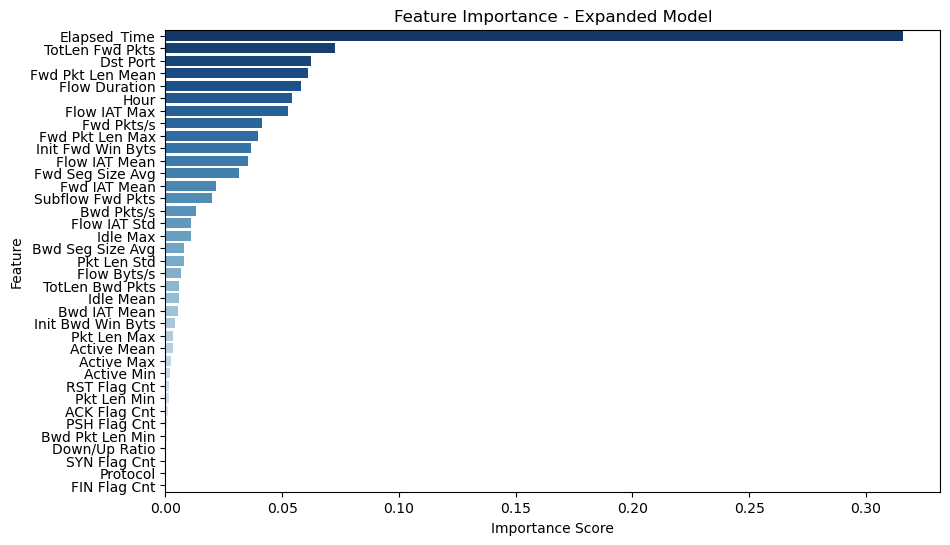

In [16]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load Dataset
data_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"
df = pd.read_csv(data_path)

# Define Label Column (Assuming 'Label' is the target variable)
label_col = 'Label'

# Define Features: Baseline (Current Set)
baseline_features = [
    "Dst Port", "TotLen Fwd Pkts", "TotLen Bwd Pkts", "Fwd Pkt Len Max", "Bwd Pkt Len Min",
    "Flow Byts/s", "Flow IAT Mean", "Flow IAT Std", "Flow IAT Max", "Fwd IAT Mean",
    "Bwd IAT Mean", "Fwd Pkts/s", "Bwd Pkts/s", "Pkt Len Min", "Pkt Len Max",
    "FIN Flag Cnt", "SYN Flag Cnt", "PSH Flag Cnt", "ACK Flag Cnt", "Down/Up Ratio",
    "Fwd Seg Size Avg", "Bwd Seg Size Avg", "Subflow Fwd Pkts", "Init Fwd Win Byts",
    "Init Bwd Win Byts", "Active Max", "Active Mean", "Active Min", "Idle Max", "Hour", "Elapsed_Time"
]

# Define Features: Expanded Set (Adding Back Previously Dropped Features)
expanded_features = baseline_features + [
    "Protocol", "Flow Duration", "Fwd Pkt Len Mean", "Pkt Len Std", "RST Flag Cnt", "Idle Mean"
]

# Train & Evaluate Function
def train_evaluate(features, dataset, model_name):
    """
    Train Random Forest Model and Evaluate Performance
    """
    X = dataset[features]
    y = dataset[label_col]

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Random Forest Model
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    # Predictions
    y_pred = clf.predict(X_test)

    # Compute Performance Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Print Results
    print(f" {model_name} - Performance Metrics")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}\n")

    return clf, accuracy, precision, recall, f1

# Train Baseline Model
print("Training Baseline Model (Current Features)...")
baseline_model, base_acc, base_prec, base_recall, base_f1 = train_evaluate(baseline_features, df, "Baseline Model")

# Train Expanded Model
print("Training Expanded Model (With Dropped Features)...")
expanded_model, exp_acc, exp_prec, exp_recall, exp_f1 = train_evaluate(expanded_features, df, "Expanded Model")

# Compare Performance
print(" **Comparison of Baseline vs. Expanded Model**")
print(f" Accuracy Change: {exp_acc - base_acc:.4f}")
print(f" Precision Change: {exp_prec - base_prec:.4f}")
print(f" Recall Change: {exp_recall - base_recall:.4f}")
print(f" F1-Score Change: {exp_f1 - base_f1:.4f}")

# Feature Importance Analysis
def plot_feature_importance(model, features, title):
    """
    Plot Feature Importance from Trained Model
    """
    feature_importance = model.feature_importances_
    importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
    importance_df = importance_df.sort_values(by="Importance", ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x="Importance", y="Feature", data=importance_df, palette="Blues_r")
    plt.title(title)
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.show()

# Plot Feature Importance for Expanded Model
plot_feature_importance(expanded_model, expanded_features, "Feature Importance - Expanded Model")

2025-03-17 17:24:04,852 - INFO - Starting Final Correlation Analysis for Global, Edge, and Device Layers.
2025-03-17 17:24:14,472 - INFO - Analyzing correlation for Global Layer.


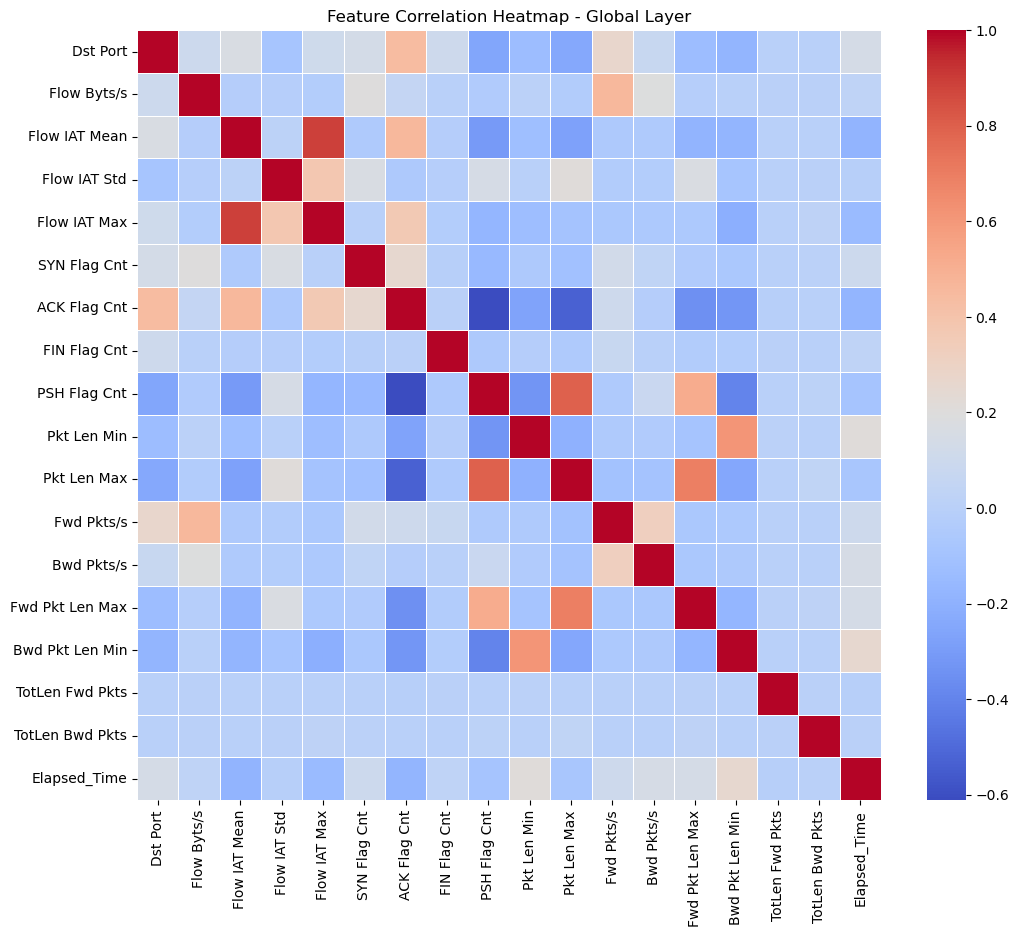

2025-03-17 17:24:16,059 - INFO - Analyzing correlation for Edge Layer.


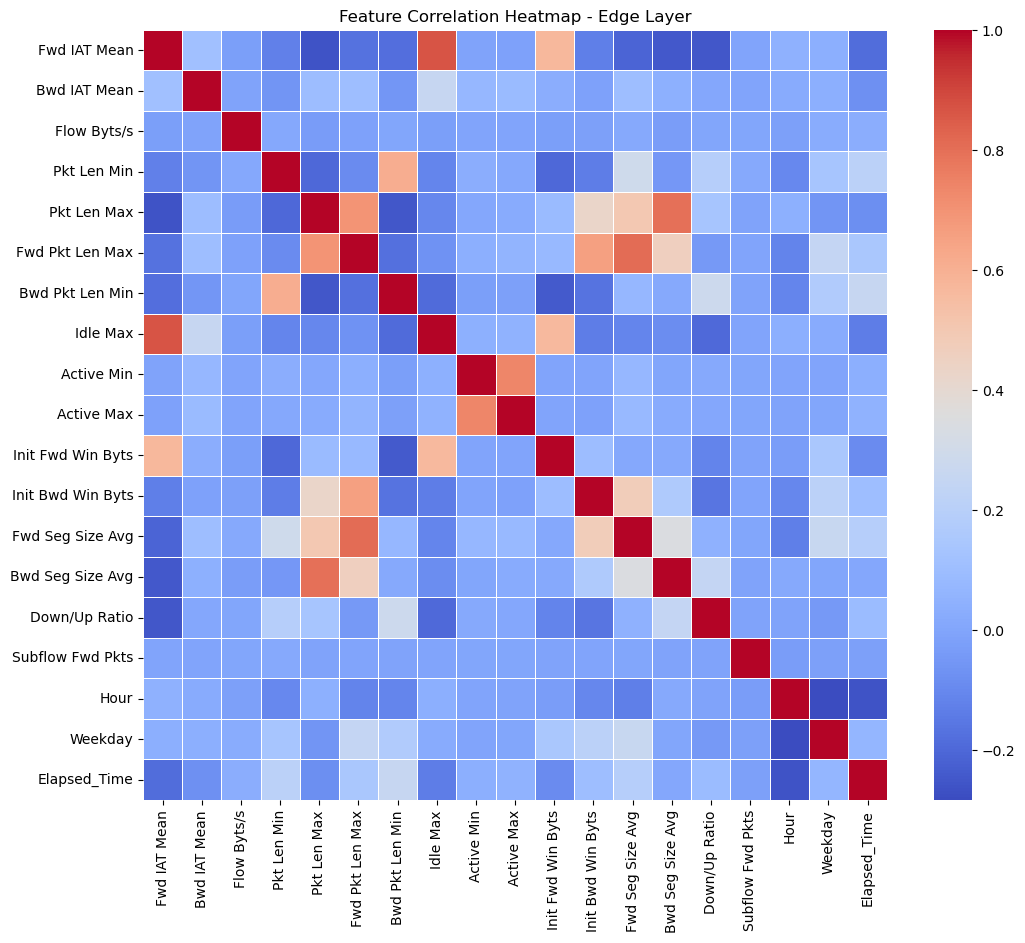

2025-03-17 17:24:17,797 - INFO - Analyzing correlation for Device Layer.


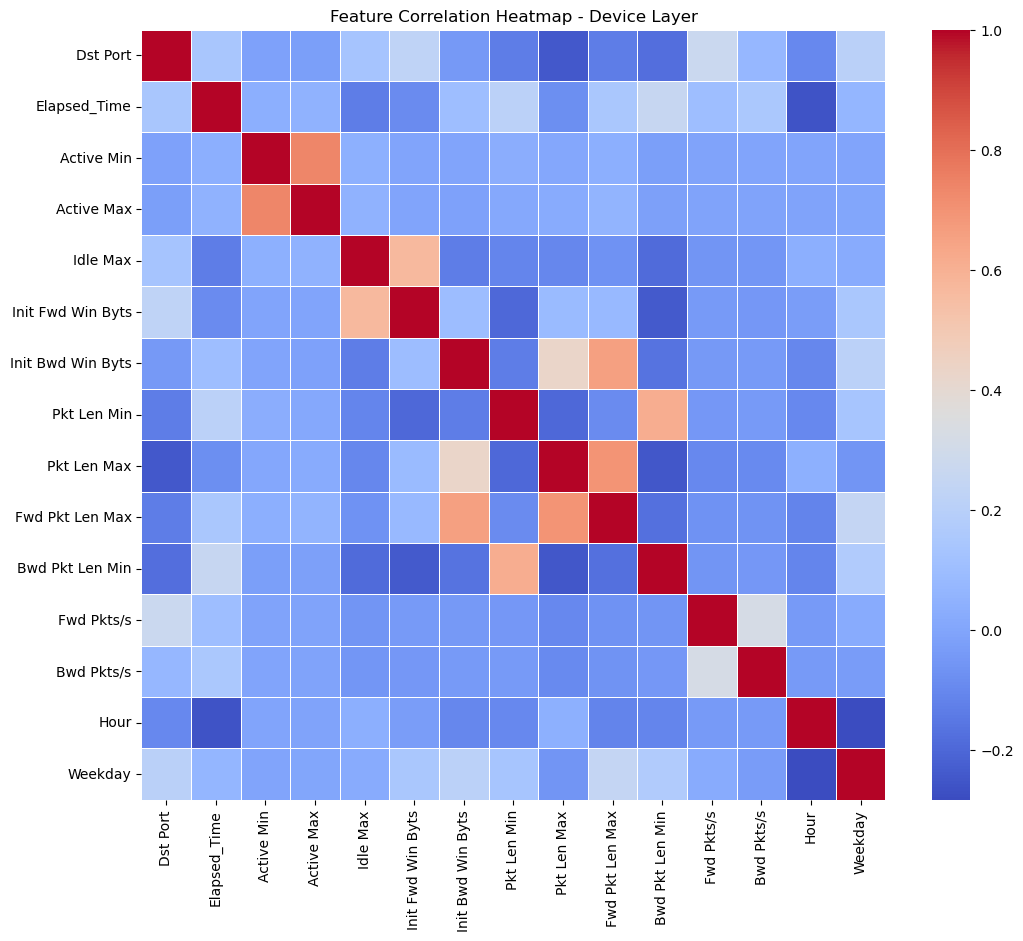

2025-03-17 17:24:19,205 - INFO - Final Correlation Analysis Completed.


In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import logging

# Set up logging
logging.basicConfig(format="%(asctime)s - %(levelname)s - %(message)s", level=logging.INFO)
logging.info("Starting Final Correlation Analysis for Global, Edge, and Device Layers.")

# Load dataset (ensure it's preprocessed & ready)
dataset_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"
df = pd.read_csv(dataset_path)

# Define per-layer feature sets (Finalized Selection)
global_features = [
    "Dst Port", "Flow Byts/s", "Flow IAT Mean", "Flow IAT Std", "Flow IAT Max",
    "SYN Flag Cnt", "ACK Flag Cnt", "FIN Flag Cnt", "PSH Flag Cnt",
    "Pkt Len Min", "Pkt Len Max", "Fwd Pkts/s", "Bwd Pkts/s", "Fwd Pkt Len Max",
    "Bwd Pkt Len Min", "TotLen Fwd Pkts", "TotLen Bwd Pkts", "Elapsed_Time"
]

edge_features = [
    "Fwd IAT Mean", "Bwd IAT Mean", "Flow Byts/s", "Pkt Len Min", "Pkt Len Max",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min", "Idle Max", "Active Min", "Active Max",
    "Init Fwd Win Byts", "Init Bwd Win Byts", "Fwd Seg Size Avg", "Bwd Seg Size Avg",
    "Down/Up Ratio", "Subflow Fwd Pkts", "Hour", "Weekday", "Elapsed_Time"
]

device_features = [
    "Dst Port", "Elapsed_Time", "Active Min", "Active Max", "Idle Max",
    "Init Fwd Win Byts", "Init Bwd Win Byts", "Pkt Len Min", "Pkt Len Max",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min", "Fwd Pkts/s", "Bwd Pkts/s", "Hour", "Weekday"
]

# Function to compute correlation and generate heatmap
def analyze_correlation(df, features, layer_name):
    logging.info(f"Analyzing correlation for {layer_name} Layer.")
    
    # Extract relevant features
    df_layer = df[features].copy()

    # Compute correlation matrix
    correlation_matrix = df_layer.corr()

    # Identify highly correlated pairs
    high_corr_pairs = correlation_matrix[abs(correlation_matrix) > 0.95]
    correlated_features = high_corr_pairs.stack().reset_index()
    correlated_features = correlated_features[
        (correlated_features['level_0'] != correlated_features['level_1'])  # Avoid self-correlation
    ].drop_duplicates()

    # Log correlated features
    if not correlated_features.empty:
        logging.info(f"Highly correlated features in {layer_name} Layer:")
        for _, row in correlated_features.iterrows():
            logging.info(f"{row['level_0']} - {row['level_1']} (Correlation: {row[0]:.2f})")

    # Plot heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
    plt.title(f"Feature Correlation Heatmap - {layer_name} Layer")
    plt.savefig(f"/Users/akashthanneeru/Desktop/INADS_Data/Feature_Correlation_{layer_name}.png", dpi=300)
    plt.show()

# Run correlation analysis for each layer
analyze_correlation(df, global_features, "Global")
analyze_correlation(df, edge_features, "Edge")
analyze_correlation(df, device_features, "Device")

logging.info("Final Correlation Analysis Completed.")

In [27]:
import pandas as pd

# Define all selected features across all layers
all_features = [
    "Dst Port", "Flow Byts/s", "Flow IAT Mean", "Flow IAT Std", "Flow IAT Max",
    "SYN Flag Cnt", "ACK Flag Cnt", "FIN Flag Cnt", "PSH Flag Cnt",
    "Pkt Len Min", "Pkt Len Max", "Fwd Pkts/s", "Bwd Pkts/s",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min", "TotLen Fwd Pkts", "TotLen Bwd Pkts", "Elapsed_Time",
    "Fwd IAT Mean", "Bwd IAT Mean", "Idle Max", "Active Min", "Active Max",
    "Init Fwd Win Byts", "Init Bwd Win Byts", "Fwd Seg Size Avg", "Bwd Seg Size Avg",
    "Down/Up Ratio", "Subflow Fwd Pkts", "Hour", "Weekday"
]

# Define selected features per layer
global_features = set([
    "Dst Port", "Flow Byts/s", "Flow IAT Mean", "Flow IAT Std", "Flow IAT Max",
    "SYN Flag Cnt", "ACK Flag Cnt", "FIN Flag Cnt", "PSH Flag Cnt",
    "Pkt Len Min", "Pkt Len Max", "Fwd Pkts/s", "Bwd Pkts/s",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min", "TotLen Fwd Pkts", "TotLen Bwd Pkts", "Elapsed_Time"
])

edge_features = set([
    "Fwd IAT Mean", "Bwd IAT Mean", "Flow Byts/s", "Pkt Len Min", "Pkt Len Max",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min", "Idle Max", "Active Min", "Active Max",
    "Init Fwd Win Byts", "Init Bwd Win Byts", "Fwd Seg Size Avg", "Bwd Seg Size Avg",
    "Down/Up Ratio", "Subflow Fwd Pkts", "Hour", "Weekday", "Elapsed_Time"
])

device_features = set([
    "Dst Port", "Elapsed_Time", "Active Min", "Active Max", "Idle Max",
    "Init Fwd Win Byts", "Init Bwd Win Byts", "Pkt Len Min", "Pkt Len Max",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min", "Fwd Pkts/s", "Bwd Pkts/s",
    "Hour", "Weekday"
])

# Create a DataFrame to show layer-wise presence of features
feature_usage = pd.DataFrame({
    "Feature": all_features,
    "Global Layer": ["Yes" if feature in global_features else "No" for feature in all_features],
    "Edge Layer": ["Yes" if feature in edge_features else "No" for feature in all_features],
    "Device Layer": ["Yes" if feature in device_features else "No" for feature in all_features]
})

# Display the DataFrame
from IPython.display import display
display(feature_usage)

,Feature,Global Layer,Edge Layer,Device Layer
0,Dst Port,Yes,No,Yes
1,Flow Byts/s,Yes,Yes,No
2,Flow IAT Mean,Yes,No,No
3,Flow IAT Std,Yes,No,No
4,Flow IAT Max,Yes,No,No
5,SYN Flag Cnt,Yes,No,No
6,ACK Flag Cnt,Yes,No,No
7,FIN Flag Cnt,Yes,No,No
8,PSH Flag Cnt,Yes,No,No
9,Pkt Len Min,Yes,Yes,Yes


In [3]:
import pandas as pd

# Load dataset (update the file path accordingly)
file_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"
df = pd.read_csv(file_path)

# Print all available columns
print("Total Columns:", len(df.columns))
print("Column Names:\n", df.columns.tolist())

Total Columns: 85
Column Names:
 ['Unique_ID', 'Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg', 'Fwd Pkts/b 

In [25]:
import pandas as pd

# Define per-layer feature sets
global_features = [
    "Flow Duration", "Flow Byts/s", "Flow IAT Mean", "Flow IAT Std", "Flow IAT Max",
    "Dst Port", "Protocol", 
    "SYN Flag Cnt", "ACK Flag Cnt", "FIN Flag Cnt", "PSH Flag Cnt",
    "Pkt Len Min", "Pkt Len Max", "Fwd Pkts/s", "Bwd Pkts/s",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min", "TotLen Fwd Pkts", "TotLen Bwd Pkts",
    "Elapsed_Time"
]

edge_features = [
    "Fwd IAT Mean", "Bwd IAT Mean", "Flow Byts/s",
    "Pkt Len Min", "Pkt Len Max", "Fwd Pkt Len Max", "Bwd Pkt Len Min",
    "Idle Max", "Active Min", "Active Max",
    "Init Fwd Win Byts", "Init Bwd Win Byts",
    "Fwd Seg Size Avg", "Bwd Seg Size Avg",
    "Down/Up Ratio", "Subflow Fwd Pkts",
    "Hour", "Weekday", "Elapsed_Time"
]

device_features = [
    "Dst Port", "Active Min", "Active Max", "Idle Max",
    "Init Fwd Win Byts", "Init Bwd Win Byts",
    "Pkt Len Min", "Pkt Len Max",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min",
    "Fwd Pkts/s", "Bwd Pkts/s",
    "Hour", "Weekday",
    "Elapsed_Time"
]

# Load dataset
file_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"
df = pd.read_csv(file_path)

# Check if all selected features exist in the dataset
global_check = [feature for feature in global_features if feature not in df.columns]
edge_check = [feature for feature in edge_features if feature not in df.columns]
device_check = [feature for feature in device_features if feature not in df.columns]

print("Missing Features in Global Layer:", global_check)
print("Missing Features in Edge Layer:", edge_check)
print("Missing Features in Device Layer:", device_check)

Missing Features in Global Layer: []
Missing Features in Edge Layer: []
Missing Features in Device Layer: []


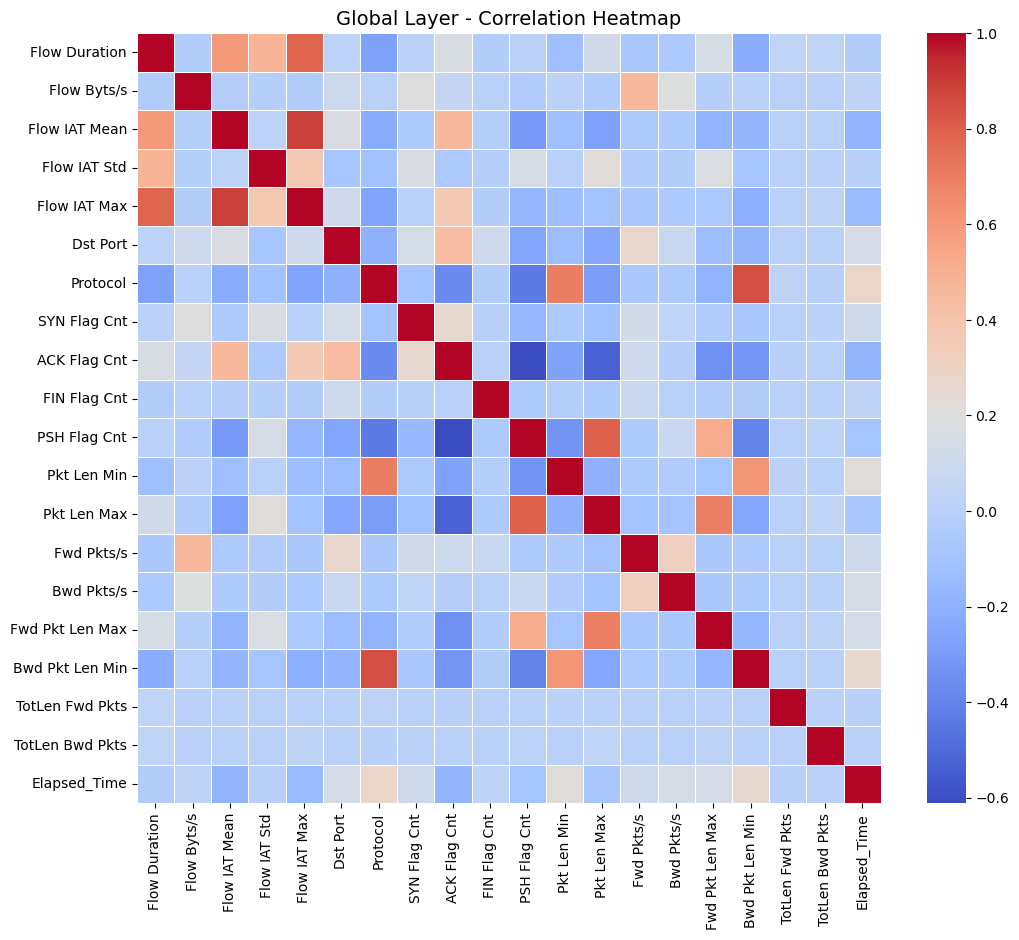

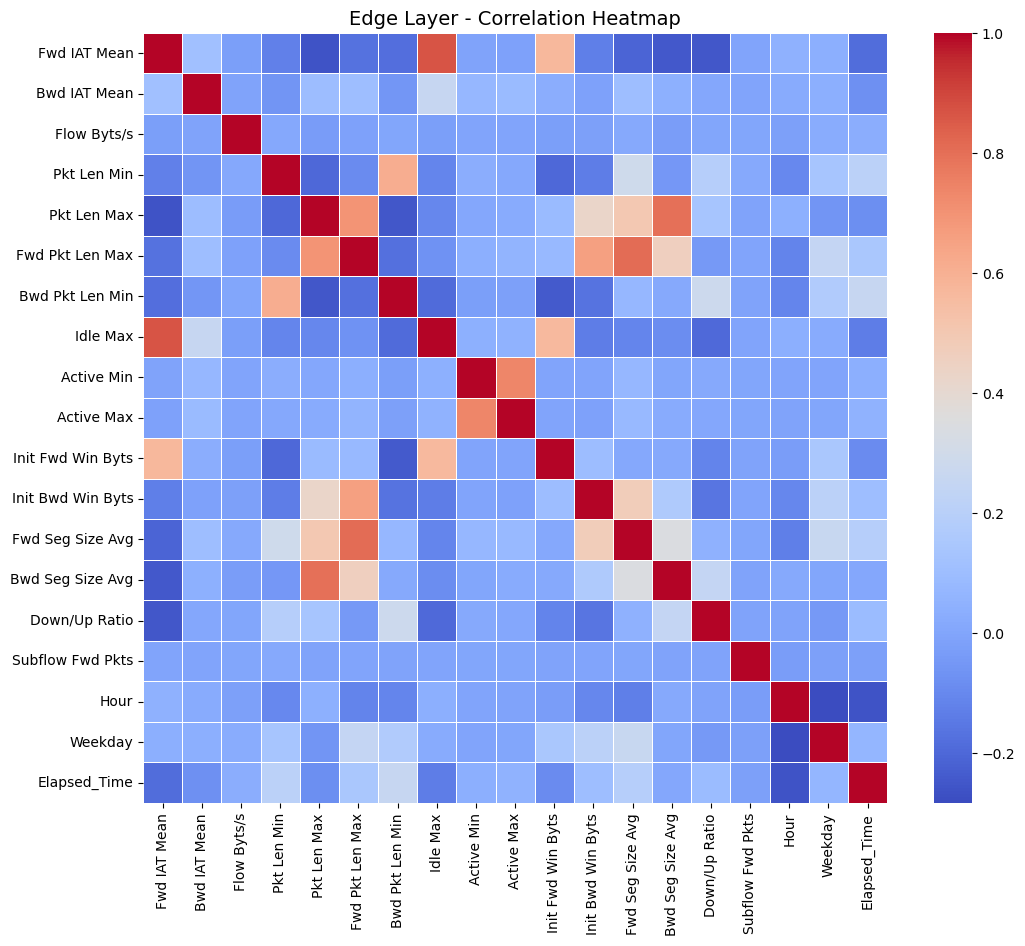

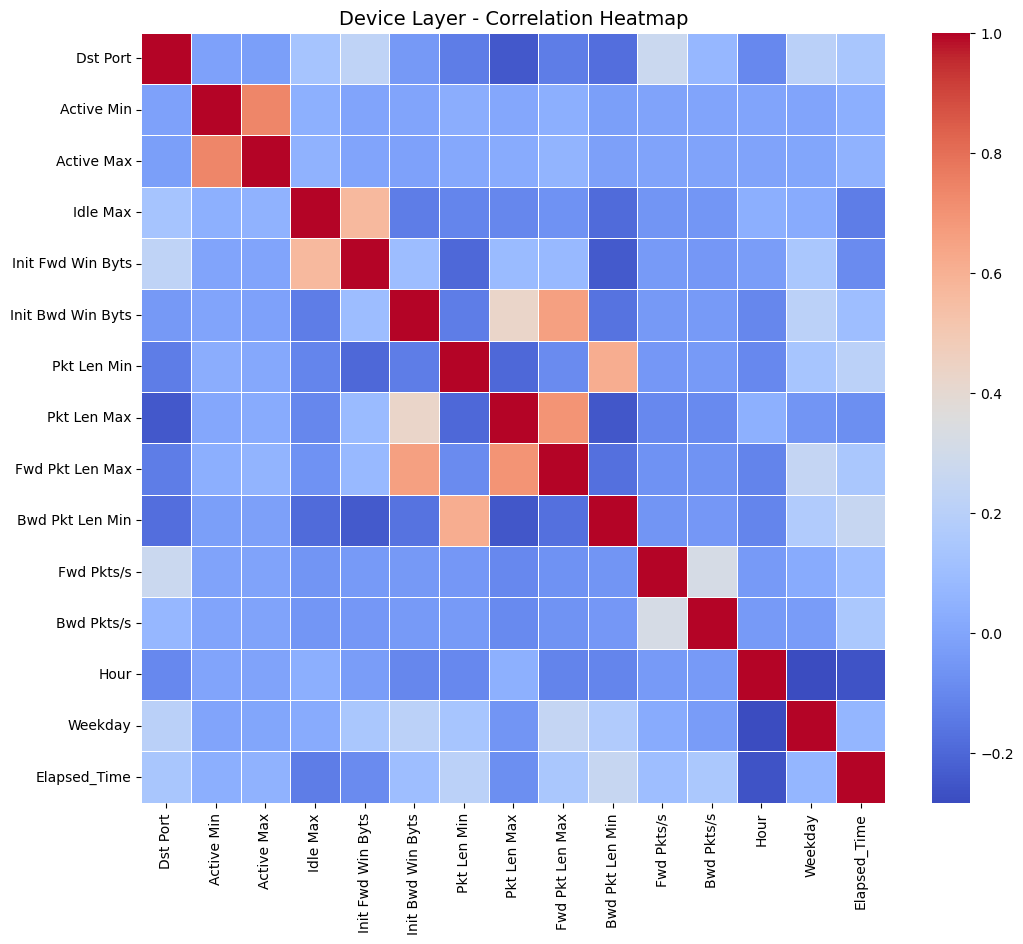

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"
df = pd.read_csv(file_path)

# Define per-layer feature sets
global_features = [
    "Flow Duration", "Flow Byts/s", "Flow IAT Mean", "Flow IAT Std", "Flow IAT Max",
    "Dst Port", "Protocol",
    "SYN Flag Cnt", "ACK Flag Cnt", "FIN Flag Cnt", "PSH Flag Cnt",
    "Pkt Len Min", "Pkt Len Max", "Fwd Pkts/s", "Bwd Pkts/s",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min", "TotLen Fwd Pkts", "TotLen Bwd Pkts",
    "Elapsed_Time"
]

edge_features = [
    "Fwd IAT Mean", "Bwd IAT Mean", "Flow Byts/s",
    "Pkt Len Min", "Pkt Len Max", "Fwd Pkt Len Max", "Bwd Pkt Len Min",
    "Idle Max", "Active Min", "Active Max",
    "Init Fwd Win Byts", "Init Bwd Win Byts",
    "Fwd Seg Size Avg", "Bwd Seg Size Avg",
    "Down/Up Ratio", "Subflow Fwd Pkts",
    "Hour", "Weekday", "Elapsed_Time"
]

device_features = [
    "Dst Port", "Active Min", "Active Max", "Idle Max",
    "Init Fwd Win Byts", "Init Bwd Win Byts",
    "Pkt Len Min", "Pkt Len Max",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min",
    "Fwd Pkts/s", "Bwd Pkts/s",
    "Hour", "Weekday",
    "Elapsed_Time"
]

# Function to plot correlation heatmap
def plot_correlation_heatmap(feature_list, title):
    df_layer = df[feature_list].copy()  # Select only relevant features
    df_corr = df_layer.corr()  # Compute correlation matrix

    plt.figure(figsize=(12, 10))
    sns.heatmap(df_corr, annot=False, cmap="coolwarm", linewidths=0.5)
    plt.title(title, fontsize=14)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

# Generate correlation heatmaps for each layer
plot_correlation_heatmap(global_features, "Global Layer - Correlation Heatmap")
plot_correlation_heatmap(edge_features, "Edge Layer - Correlation Heatmap")
plot_correlation_heatmap(device_features, "Device Layer - Correlation Heatmap")


Training Random Forest for Global Layer...
Feature importance saved: Global_Feature_Importance.csv


/var/folders/np/t44vfnk15zj6fnnj8h0mdmb40000gn/T/ipykernel_3828/656934225.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=global_importance, palette="Blues_r")


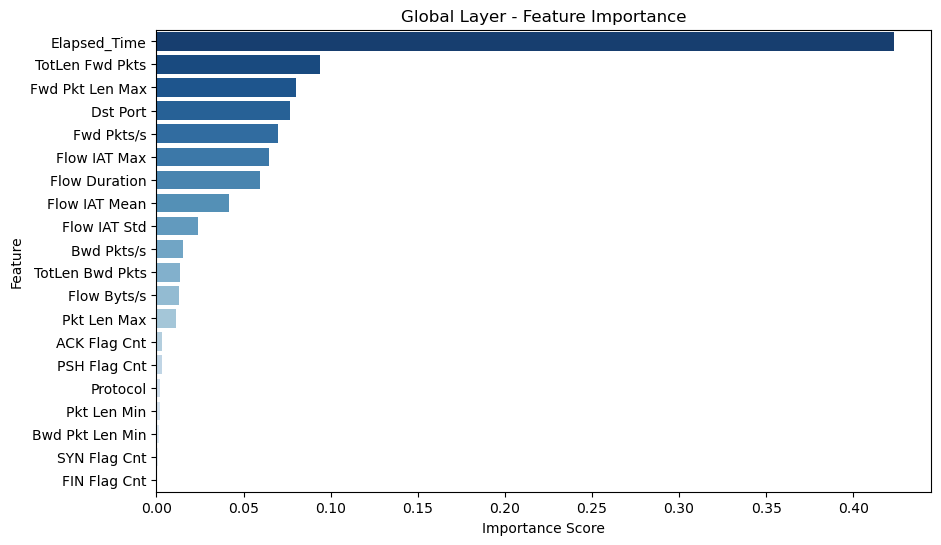


Top 10 Features for Global Layer:
             Feature  Importance
19     Elapsed_Time    0.423679
17  TotLen Fwd Pkts    0.093696
15  Fwd Pkt Len Max    0.080144
5          Dst Port    0.076727
13       Fwd Pkts/s    0.070047
4      Flow IAT Max    0.064808
0     Flow Duration    0.059454
2     Flow IAT Mean    0.041866
3      Flow IAT Std    0.023664
14       Bwd Pkts/s    0.015322


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load dataset
file_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"
df = pd.read_csv(file_path)

# Encode Labels
label_encoder = LabelEncoder()
df["Label"] = label_encoder.fit_transform(df["Label"])

# Define Global Layer Features
global_features = [
    "Flow Duration", "Flow Byts/s", "Flow IAT Mean", "Flow IAT Std", "Flow IAT Max",
    "Dst Port", "Protocol", "SYN Flag Cnt", "ACK Flag Cnt", "FIN Flag Cnt", "PSH Flag Cnt",
    "Pkt Len Min", "Pkt Len Max", "Fwd Pkts/s", "Bwd Pkts/s",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min", "TotLen Fwd Pkts", "TotLen Bwd Pkts",
    "Elapsed_Time"
]

# Train Random Forest for Global Layer
print("\nTraining Random Forest for Global Layer...")
X = df[global_features]
y = df["Label"]

rf_global = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
rf_global.fit(X, y)

# Get feature importance
global_importance = pd.DataFrame({
    "Feature": global_features,
    "Importance": rf_global.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Save as CSV
global_importance.to_csv("Global_Feature_Importance.csv", index=False)
print("Feature importance saved: Global_Feature_Importance.csv")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=global_importance, palette="Blues_r")
plt.title("Global Layer - Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Print top features
print("\nTop 10 Features for Global Layer:\n", global_importance.head(10))


Training Random Forest for Edge Layer...
Feature importance saved: Edge_Feature_Importance.csv


/var/folders/np/t44vfnk15zj6fnnj8h0mdmb40000gn/T/ipykernel_3828/3538985883.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=edge_importance, palette="Reds_r")


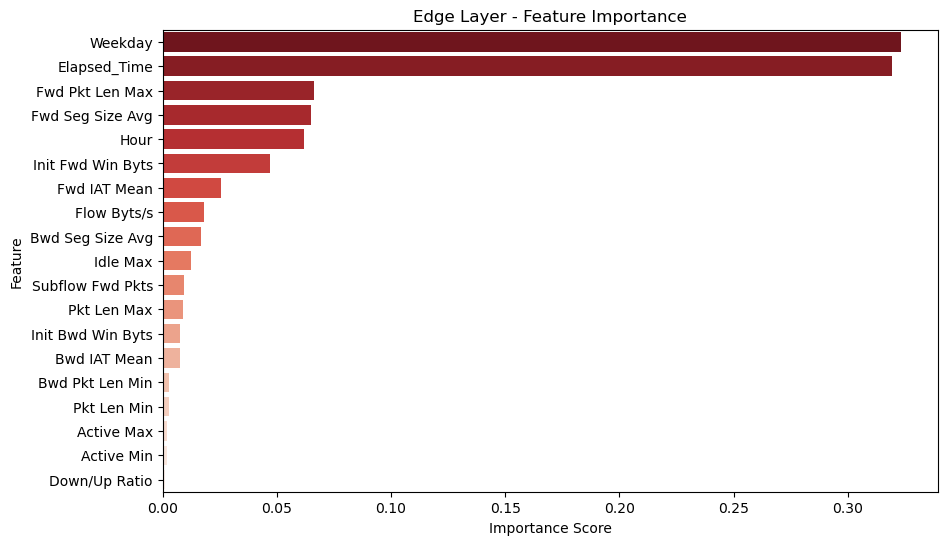


Top 10 Features for Edge Layer:
               Feature  Importance
17            Weekday    0.323144
18       Elapsed_Time    0.319173
5     Fwd Pkt Len Max    0.066373
12   Fwd Seg Size Avg    0.064838
16               Hour    0.062053
10  Init Fwd Win Byts    0.046857
0        Fwd IAT Mean    0.025548
2         Flow Byts/s    0.018317
13   Bwd Seg Size Avg    0.016984
7            Idle Max    0.012402


In [49]:
# Define Edge Layer Features
edge_features = [
    "Fwd IAT Mean", "Bwd IAT Mean", "Flow Byts/s", "Pkt Len Min", "Pkt Len Max",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min", "Idle Max", "Active Min", "Active Max",
    "Init Fwd Win Byts", "Init Bwd Win Byts", "Fwd Seg Size Avg", "Bwd Seg Size Avg",
    "Down/Up Ratio", "Subflow Fwd Pkts", "Hour", "Weekday", "Elapsed_Time"
]

# Train Random Forest for Edge Layer
print("\nTraining Random Forest for Edge Layer...")
X = df[edge_features]
y = df["Label"]

rf_edge = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
rf_edge.fit(X, y)

# Get feature importance
edge_importance = pd.DataFrame({
    "Feature": edge_features,
    "Importance": rf_edge.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Save as CSV
edge_importance.to_csv("Edge_Feature_Importance.csv", index=False)
print("Feature importance saved: Edge_Feature_Importance.csv")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=edge_importance, palette="Reds_r")
plt.title("Edge Layer - Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Print top features
print("\nTop 10 Features for Edge Layer:\n", edge_importance.head(10))


Training Random Forest for Device Layer...
Feature importance saved: Device_Feature_Importance.csv


/var/folders/np/t44vfnk15zj6fnnj8h0mdmb40000gn/T/ipykernel_3828/1737380859.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=device_importance, palette="Greens_r")


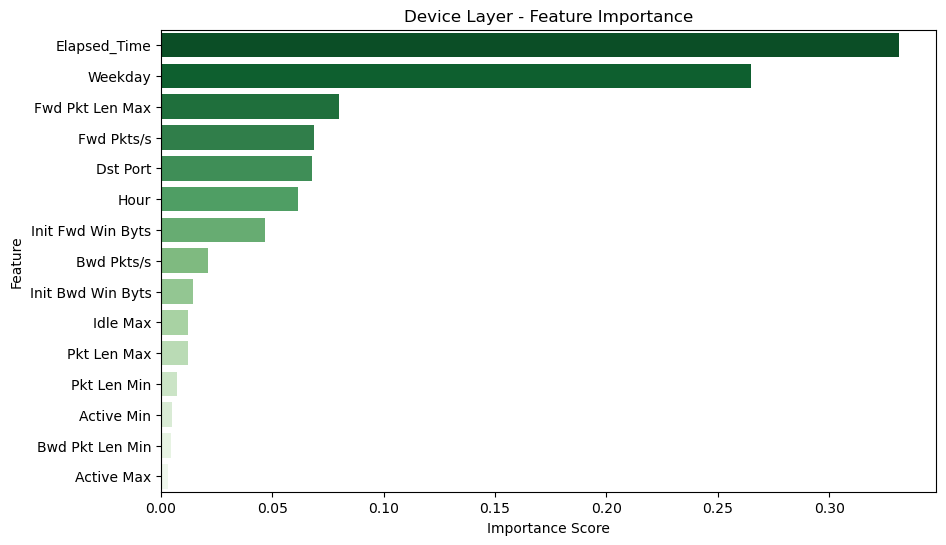


Top 10 Features for Device Layer:
               Feature  Importance
14       Elapsed_Time    0.331395
13            Weekday    0.264668
8     Fwd Pkt Len Max    0.079704
10         Fwd Pkts/s    0.068665
0            Dst Port    0.067842
12               Hour    0.061414
4   Init Fwd Win Byts    0.046779
11         Bwd Pkts/s    0.021187
5   Init Bwd Win Byts    0.014528
3            Idle Max    0.012034


In [51]:
# Define Device Layer Features
device_features = [
    "Dst Port", "Active Min", "Active Max", "Idle Max", "Init Fwd Win Byts",
    "Init Bwd Win Byts", "Pkt Len Min", "Pkt Len Max", "Fwd Pkt Len Max",
    "Bwd Pkt Len Min", "Fwd Pkts/s", "Bwd Pkts/s", "Hour", "Weekday",
    "Elapsed_Time"
]

# Train Random Forest for Device Layer
print("\nTraining Random Forest for Device Layer...")
X = df[device_features]
y = df["Label"]

rf_device = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
rf_device.fit(X, y)

# Get feature importance
device_importance = pd.DataFrame({
    "Feature": device_features,
    "Importance": rf_device.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Save as CSV
device_importance.to_csv("Device_Feature_Importance.csv", index=False)
print("Feature importance saved: Device_Feature_Importance.csv")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=device_importance, palette="Greens_r")
plt.title("Device Layer - Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Print top features
print("\nTop 10 Features for Device Layer:\n", device_importance.head(10))

In [55]:
import pandas as pd
import logging
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import joblib

# Configure logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# Load dataset
file_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"
df = pd.read_csv(file_path)

# Define features including Elapsed_Time
global_features_with_time = [
    "Flow Duration", "Flow Byts/s", "Flow IAT Mean", "Flow IAT Std", "Flow IAT Max",
    "Dst Port", "Protocol", "SYN Flag Cnt", "ACK Flag Cnt", "FIN Flag Cnt", "PSH Flag Cnt",
    "Pkt Len Min", "Pkt Len Max", "Fwd Pkts/s", "Bwd Pkts/s",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min", "TotLen Fwd Pkts", "TotLen Bwd Pkts",
    "Elapsed_Time"
]

label_column = "Label"

# Split Data
X = df[global_features_with_time]
y = df[label_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize Random Forest model
model = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)

# Start training
logging.info("Training Global Layer Model with Elapsed_Time...")
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
logging.info(f"Training completed in {training_time:.2f} seconds.")

# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

logging.info(f"Model Accuracy: {accuracy:.4f}")
logging.info("\n" + classification_report_output)

2025-03-19 09:37:34,324 - INFO - Training Global Layer Model with Elapsed_Time...
2025-03-19 09:41:01,796 - INFO - Training completed in 207.47 seconds.
2025-03-19 09:41:12,972 - INFO - Model Accuracy: 0.9490
2025-03-19 09:41:12,972 - INFO - 
                        precision    recall  f1-score   support

                Benign       0.96      0.97      0.96    314734
      Brute Force -Web       0.93      0.75      0.83        72
      Brute Force -XSS       0.80      0.67      0.73        30
DDoS attacks-LOIC-HTTP       1.00      1.00      1.00    115235
 DoS attacks-GoldenEye       1.00      1.00      1.00      8291
 DoS attacks-Slowloris       1.00      1.00      1.00      2057
         Infilteration       0.12      0.11      0.12     13645

              accuracy                           0.95    454064
             macro avg       0.83      0.78      0.81    454064
          weighted avg       0.95      0.95      0.95    454064



In [56]:
import pandas as pd
import logging
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import joblib

# Configure logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# Load dataset
file_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"
df = pd.read_csv(file_path)

# Define features excluding Elapsed_Time
global_features_without_time = [
    "Flow Duration", "Flow Byts/s", "Flow IAT Mean", "Flow IAT Std", "Flow IAT Max",
    "Dst Port", "Protocol", "SYN Flag Cnt", "ACK Flag Cnt", "FIN Flag Cnt", "PSH Flag Cnt",
    "Pkt Len Min", "Pkt Len Max", "Fwd Pkts/s", "Bwd Pkts/s",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min", "TotLen Fwd Pkts", "TotLen Bwd Pkts"
]

label_column = "Label"

# Split Data
X = df[global_features_without_time]
y = df[label_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize Random Forest model
model = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)

# Start training
logging.info("Training Global Layer Model without Elapsed_Time...")
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
logging.info(f"Training completed in {training_time:.2f} seconds.")

# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

logging.info(f"Model Accuracy: {accuracy:.4f}")
logging.info("\n" + classification_report_output)

2025-03-19 09:41:24,610 - INFO - Training Global Layer Model without Elapsed_Time...
2025-03-19 09:46:26,954 - INFO - Training completed in 302.34 seconds.
2025-03-19 09:46:41,024 - INFO - Model Accuracy: 0.9508
2025-03-19 09:46:41,024 - INFO - 
                        precision    recall  f1-score   support

                Benign       0.96      0.98      0.97    314734
      Brute Force -Web       0.91      0.40      0.56        72
      Brute Force -XSS       0.86      0.63      0.73        30
DDoS attacks-LOIC-HTTP       0.99      0.99      0.99    115235
 DoS attacks-GoldenEye       0.93      0.93      0.93      8291
 DoS attacks-Slowloris       1.00      1.00      1.00      2057
         Infilteration       0.05      0.03      0.04     13645

              accuracy                           0.95    454064
             macro avg       0.81      0.71      0.74    454064
          weighted avg       0.94      0.95      0.94    454064



In [59]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
file_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"
df = pd.read_csv(file_path)

# Define Edge Layer Features (With Elapsed_Time)
edge_features = [
    "Fwd IAT Mean", "Bwd IAT Mean", "Flow Byts/s",
    "Pkt Len Min", "Pkt Len Max", "Fwd Pkt Len Max", "Bwd Pkt Len Min",
    "Idle Max", "Active Min", "Active Max",
    "Init Fwd Win Byts", "Init Bwd Win Byts",
    "Fwd Seg Size Avg", "Bwd Seg Size Avg",
    "Down/Up Ratio", "Subflow Fwd Pkts",
    "Hour", "Weekday", "Elapsed_Time"
]

# Prepare labels and features
X = df[edge_features]
y = df["Label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
print("Training Edge Layer Model with Elapsed_Time...")
start_time = time.time()
model = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
end_time = time.time()

# Evaluate Model
print(f"Training completed in {end_time - start_time:.2f} seconds.")
y_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Training Edge Layer Model with Elapsed_Time...
Training completed in 122.60 seconds.
Model Accuracy: 0.9509
                        precision    recall  f1-score   support

                Benign       0.96      0.97      0.96    314686
      Brute Force -Web       1.00      0.90      0.94        67
      Brute Force -XSS       1.00      0.97      0.98        32
DDoS attacks-LOIC-HTTP       1.00      1.00      1.00    115275
 DoS attacks-GoldenEye       1.00      1.00      1.00      8273
 DoS attacks-Slowloris       1.00      1.00      1.00      2080
         Infilteration       0.13      0.11      0.12     13651

              accuracy                           0.95    454064
             macro avg       0.87      0.85      0.86    454064
          weighted avg       0.95      0.95      0.95    454064



In [60]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
file_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"
df = pd.read_csv(file_path)

# Define Edge Layer Features (Without Elapsed_Time)
edge_features = [
    "Fwd IAT Mean", "Bwd IAT Mean", "Flow Byts/s",
    "Pkt Len Min", "Pkt Len Max", "Fwd Pkt Len Max", "Bwd Pkt Len Min",
    "Idle Max", "Active Min", "Active Max",
    "Init Fwd Win Byts", "Init Bwd Win Byts",
    "Fwd Seg Size Avg", "Bwd Seg Size Avg",
    "Down/Up Ratio", "Subflow Fwd Pkts",
    "Hour", "Weekday"
]

# Prepare labels and features
X = df[edge_features]
y = df["Label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
print("Training Edge Layer Model without Elapsed_Time...")
start_time = time.time()
model = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
end_time = time.time()

# Evaluate Model
print(f"Training completed in {end_time - start_time:.2f} seconds.")
y_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Training Edge Layer Model without Elapsed_Time...
Training completed in 133.43 seconds.
Model Accuracy: 0.9517
                        precision    recall  f1-score   support

                Benign       0.96      0.97      0.97    314686
      Brute Force -Web       1.00      0.90      0.94        67
      Brute Force -XSS       1.00      0.97      0.98        32
DDoS attacks-LOIC-HTTP       1.00      1.00      1.00    115275
 DoS attacks-GoldenEye       1.00      1.00      1.00      8273
 DoS attacks-Slowloris       1.00      1.00      1.00      2080
         Infilteration       0.11      0.09      0.10     13651

              accuracy                           0.95    454064
             macro avg       0.87      0.85      0.86    454064
          weighted avg       0.95      0.95      0.95    454064



In [61]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
file_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"
df = pd.read_csv(file_path)

# Define Device Layer Features (With Elapsed_Time)
device_features = [
    "Dst Port", "Active Min", "Active Max", "Idle Max",
    "Init Fwd Win Byts", "Init Bwd Win Byts",
    "Pkt Len Min", "Pkt Len Max",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min",
    "Fwd Pkts/s", "Bwd Pkts/s",
    "Hour", "Weekday", "Elapsed_Time"
]

# Prepare labels and features
X = df[device_features]
y = df["Label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
print("Training Device Layer Model with Elapsed_Time...")
start_time = time.time()
model = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
end_time = time.time()

# Evaluate Model
print(f"Training completed in {end_time - start_time:.2f} seconds.")
y_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Training Device Layer Model with Elapsed_Time...
Training completed in 112.71 seconds.
Model Accuracy: 0.9491
                        precision    recall  f1-score   support

                Benign       0.96      0.96      0.96    314686
      Brute Force -Web       1.00      0.90      0.94        67
      Brute Force -XSS       1.00      0.97      0.98        32
DDoS attacks-LOIC-HTTP       1.00      1.00      1.00    115275
 DoS attacks-GoldenEye       1.00      1.00      1.00      8273
 DoS attacks-Slowloris       1.00      1.00      1.00      2080
         Infilteration       0.13      0.12      0.12     13651

              accuracy                           0.95    454064
             macro avg       0.87      0.85      0.86    454064
          weighted avg       0.95      0.95      0.95    454064



In [62]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
file_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"
df = pd.read_csv(file_path)

# Define Device Layer Features (Without Elapsed_Time)
device_features = [
    "Dst Port", "Active Min", "Active Max", "Idle Max",
    "Init Fwd Win Byts", "Init Bwd Win Byts",
    "Pkt Len Min", "Pkt Len Max",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min",
    "Fwd Pkts/s", "Bwd Pkts/s",
    "Hour", "Weekday"
]

# Prepare labels and features
X = df[device_features]
y = df["Label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
print("Training Device Layer Model without Elapsed_Time...")
start_time = time.time()
model = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
end_time = time.time()

# Evaluate Model
print(f"Training completed in {end_time - start_time:.2f} seconds.")
y_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Training Device Layer Model without Elapsed_Time...
Training completed in 116.19 seconds.
Model Accuracy: 0.9496
                        precision    recall  f1-score   support

                Benign       0.96      0.97      0.96    314686
      Brute Force -Web       1.00      0.90      0.94        67
      Brute Force -XSS       1.00      0.94      0.97        32
DDoS attacks-LOIC-HTTP       1.00      1.00      1.00    115275
 DoS attacks-GoldenEye       1.00      1.00      1.00      8273
 DoS attacks-Slowloris       1.00      1.00      1.00      2080
         Infilteration       0.11      0.09      0.10     13651

              accuracy                           0.95    454064
             macro avg       0.87      0.84      0.85    454064
          weighted avg       0.95      0.95      0.95    454064



In [70]:
import pandas as pd

# Load dataset (update the file path accordingly)
file_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Cyclical_Encoded.csv"
df = pd.read_csv(file_path)

# Print all available columns
print("Total Columns:", len(df.columns))
print("Column Names:\n", df.columns.tolist())

Total Columns: 88
Column Names:
 ['Unique_ID', 'Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg', 'Fwd Pkts/b 

In [74]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Load dataset
file_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Cyclical_Encoded.csv"
df = pd.read_csv(file_path)

# Define corrected Global Layer features (WITHOUT Elapsed_Time)
global_features = [
    "Flow Duration", "Flow Byts/s", "Flow IAT Mean", "Flow IAT Std", "Flow IAT Max",
    "Dst Port", "Protocol", "SYN Flag Cnt", "ACK Flag Cnt", "FIN Flag Cnt", "PSH Flag Cnt",
    "Pkt Len Min", "Pkt Len Max", "Fwd Pkts/s", "Bwd Pkts/s",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min", "TotLen Fwd Pkts", "TotLen Bwd Pkts",
    "Hour_sin", "Hour_cos", "Weekday_sin", "Weekday_cos"  # Only Cyclical Encoding
]

# Extract features and labels
X = df[global_features]
y = df["Label"]

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize Random Forest
rf_model = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)

# Train model
start_time = time.time()
rf_model.fit(X_train, y_train)
training_time = time.time() - start_time

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print Results
print("Training Time:", round(training_time, 2), "seconds")
print("Model Accuracy:", round(accuracy, 4))
print("\nClassification Report:\n", class_report)

Training Time: 154.61 seconds
Model Accuracy: 0.9501

Classification Report:
                         precision    recall  f1-score   support

                Benign       0.96      0.97      0.96    314734
      Brute Force -Web       0.92      0.68      0.78        72
      Brute Force -XSS       0.83      0.67      0.74        30
DDoS attacks-LOIC-HTTP       1.00      1.00      1.00    115235
 DoS attacks-GoldenEye       1.00      1.00      1.00      8291
 DoS attacks-Slowloris       1.00      1.00      1.00      2057
         Infilteration       0.09      0.08      0.08     13645

              accuracy                           0.95    454064
             macro avg       0.83      0.77      0.80    454064
          weighted avg       0.95      0.95      0.95    454064



In [10]:
global_features = [
    "Flow Duration", "Flow Byts/s",
    "Flow IAT Mean", "Flow IAT Std", "Flow IAT Max",
    "Dst Port", "Protocol",
    "SYN Flag Cnt", "ACK Flag Cnt", "FIN Flag Cnt", "PSH Flag Cnt",
    "Pkt Len Min", "Pkt Len Max",
    "Fwd Pkts/s", "Bwd Pkts/s",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min",
    "TotLen Fwd Pkts", "TotLen Bwd Pkts",
    "Hour_sin", "Hour_cos",
    "Weekday_sin", "Weekday_cos"
]

edge_features = [
    "Pkt Len Min", "Pkt Len Max",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min",
    "Fwd Pkts/s", "Bwd Pkts/s",
    "Fwd IAT Mean" 
]

device_features = [
    "Dst Port",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min",
    "Pkt Len Var", "Fwd Pkt Len Std", "Bwd Pkt Len Std",
    "Flow Duration", "Flow IAT Mean", "Flow IAT Std",
    "Idle Max", "Idle Mean", "Active Min", "Active Max",
    "Init Fwd Win Byts", "Init Bwd Win Byts",
    "Fwd Header Len", "Bwd Header Len",
    "Pkt Size Avg", "Fwd Seg Size Avg", "Bwd Seg Size Avg",
    "Hour_sin", "Hour_cos"
]

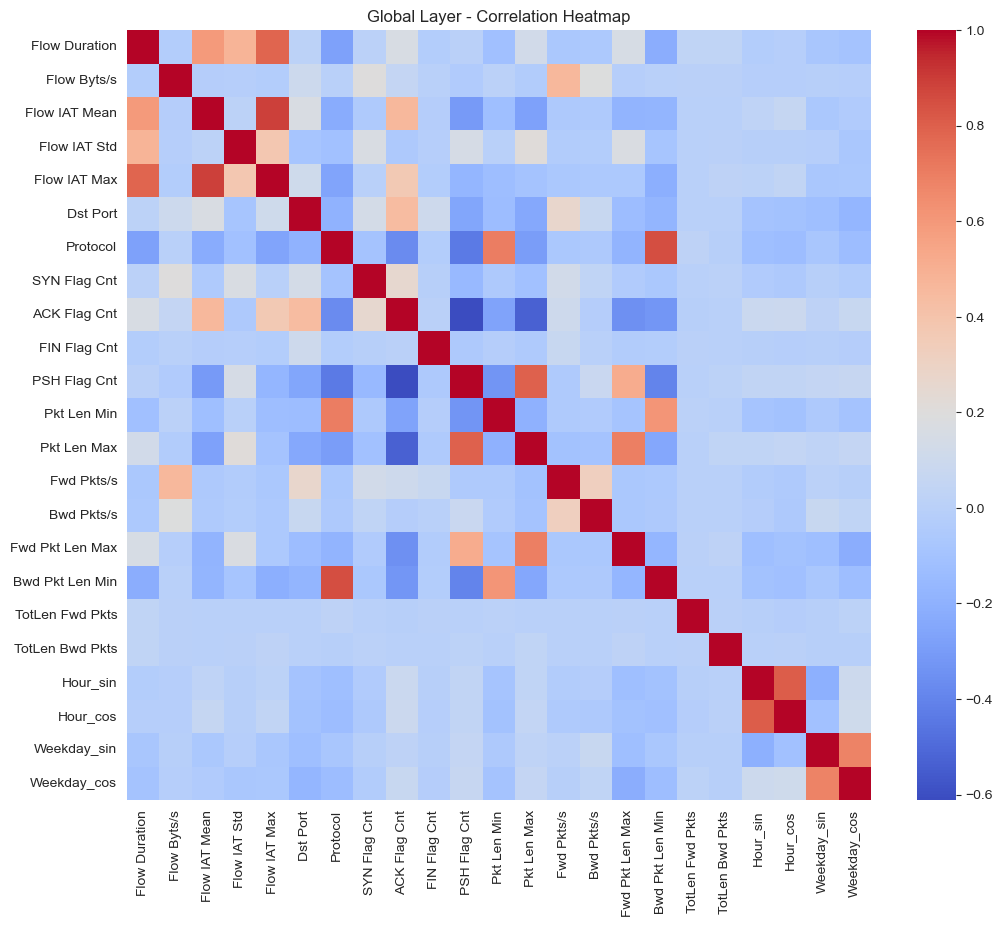

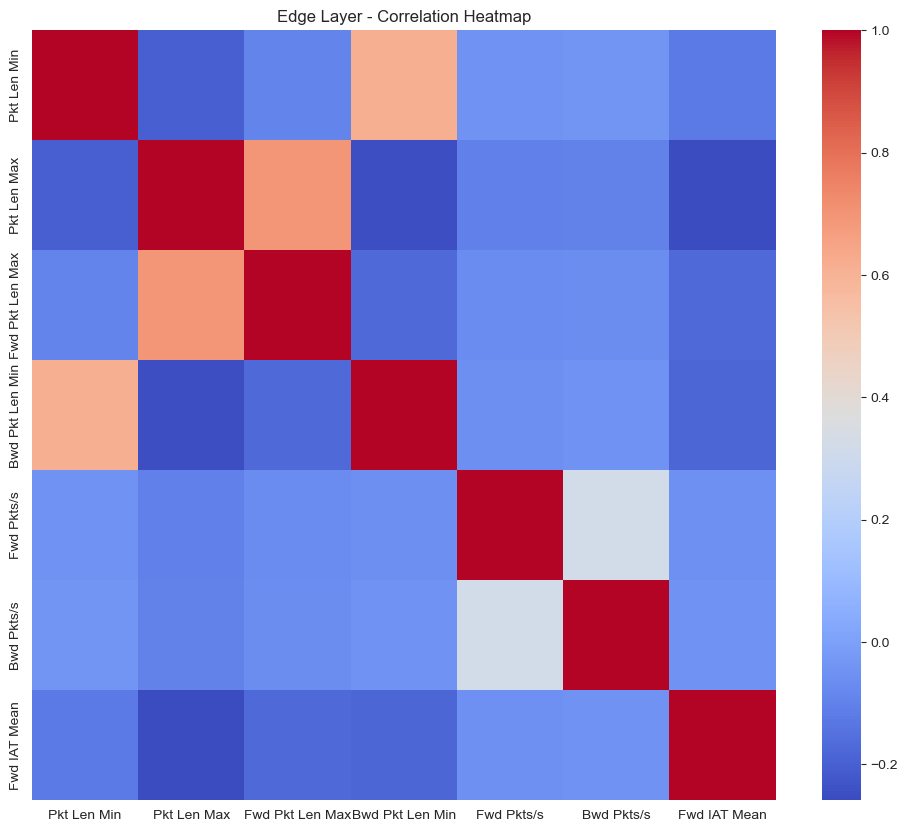

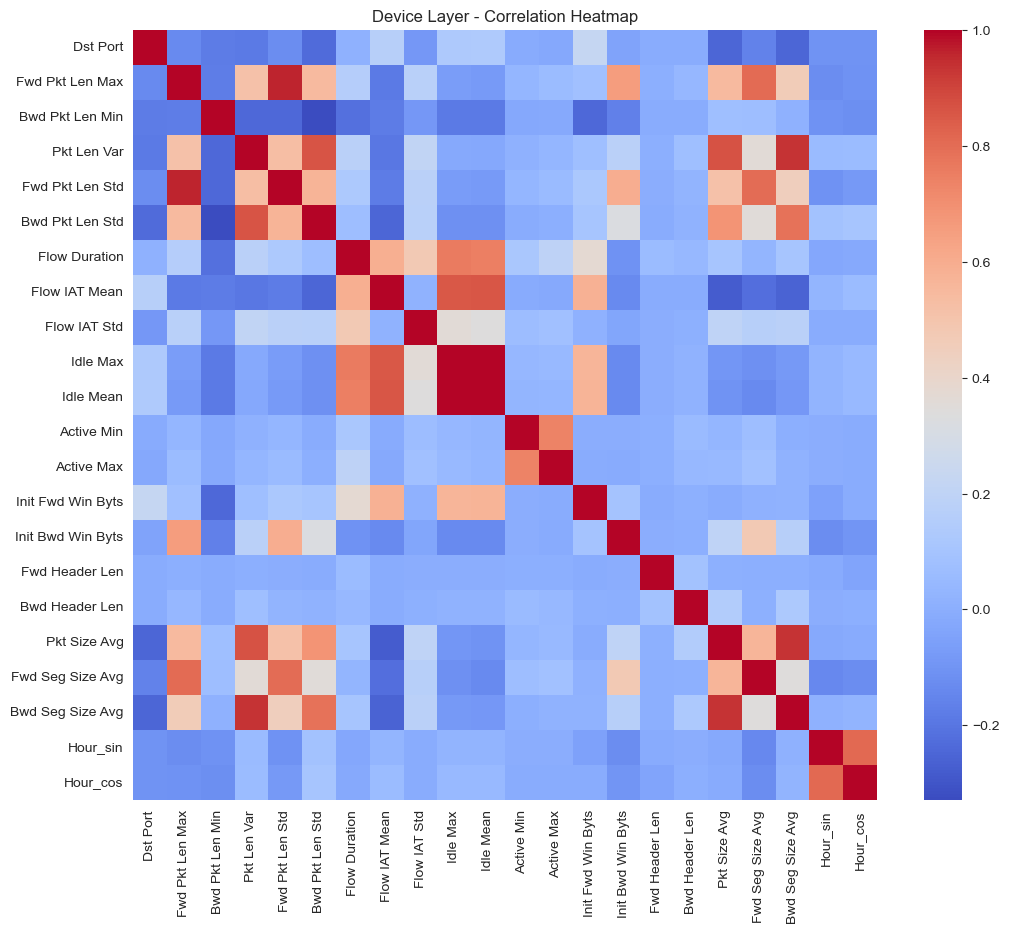

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Cyclical_Encoded.csv"
df = pd.read_csv(file_path)

# Define feature sets for final correlation check
feature_sets = {
    "Global Layer": global_features,
    "Edge Layer": edge_features,
    "Device Layer": device_features
}

# Plot correlation matrices
for layer, features in feature_sets.items():
    plt.figure(figsize=(12, 10))
    correlation_matrix = df[features].corr()
    sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f")
    plt.title(f"{layer} - Correlation Heatmap")
    plt.show()

In [2]:
import pandas as pd

# Replace with the correct file path on your local system
file_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Cyclical_Encoded.csv"

try:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Print the column names
    print(df.columns)

except FileNotFoundError:
    print(f"Error: File '{file_path}' not found. Please ensure the path is correct.")
except Exception as e:
    print(f"An error occurred: {e}")

Index(['Unique_ID', 'Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [6]:
import pandas as pd

# Replace with the correct file path on your local system
file_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Cyclical_Encoded.csv"

try:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Check data types and count
    data_types = df.dtypes
    data_type_counts = data_types.value_counts()

    print("Data Types and Counts:")
    print(data_type_counts)
    print("\nData Types of each column:")
    print(data_types)

except FileNotFoundError:
    print(f"Error: File '{file_path}' not found. Please ensure the path is correct.")
except Exception as e:
    print(f"An error occurred: {e}")

Data Types and Counts:
float64    83
object      3
int64       2
Name: count, dtype: int64

Data Types of each column:
Unique_ID         object
Dst Port         float64
Protocol         float64
Flow Duration    float64
Tot Fwd Pkts     float64
                  ...   
Timestamp         object
Hour_sin         float64
Hour_cos         float64
Weekday_sin      float64
Weekday_cos      float64
Length: 88, dtype: object


In [8]:
import pandas as pd

# Replace with the correct file path on your local system
file_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Cyclical_Encoded.csv"

try:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Separate object and int columns
    object_columns = df.select_dtypes(include=['object']).columns
    int_columns = df.select_dtypes(include=['int64']).columns

    print("Object Columns:")
    print(object_columns)

    print("\nInteger Columns:")
    print(int_columns)

except FileNotFoundError:
    print(f"Error: File '{file_path}' not found. Please ensure the path is correct.")
except Exception as e:
    print(f"An error occurred: {e}")

Object Columns:
Index(['Unique_ID', 'Label', 'Timestamp'], dtype='object')

Integer Columns:
Index(['Day', 'Month'], dtype='object')
